# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** 13.5

**Напоминание:**
    
* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [1]:
%pylab inline
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('figure', dpi=200)
plt.rc('grid', c='grey', ls=':')
plt.rc('image', cmap='Greys', interpolation='none')
np.set_printoptions(suppress=True)

## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

<font color=blue>Вычислим весовые коэффициенты и смещения для $L_2$- и $L_1$-регуляризации в зависимости от alpha:</font>

In [4]:
from sklearn.linear_model import Lasso, Ridge

regs = [Ridge, Lasso]
names = ['L2 (Ridge)', 'L1 (Lasso)']
alphas = np.logspace(-3, 3, 100)

weights = np.empty(shape=(len(regs), len(alphas), X_train.shape[1]), dtype=float)
intercepts = np.empty(shape=weights.shape[:-1], dtype=float)

for i, reg in enumerate(regs):
    for j, alpha in enumerate(alphas):
        model = reg(alpha=alpha)
        model.fit(X_train, y_train)
        weights[i, j] = model.coef_
        intercepts[i, j] = model.intercept_

<font color=blue>Посмотрим на результаты. Начнем с весовых коэффициентов (здесь и далее **весами** называются только коэффициенты $w_1, w_2, \dots$, то есть $w_0$ пока не рассматривается):</font>

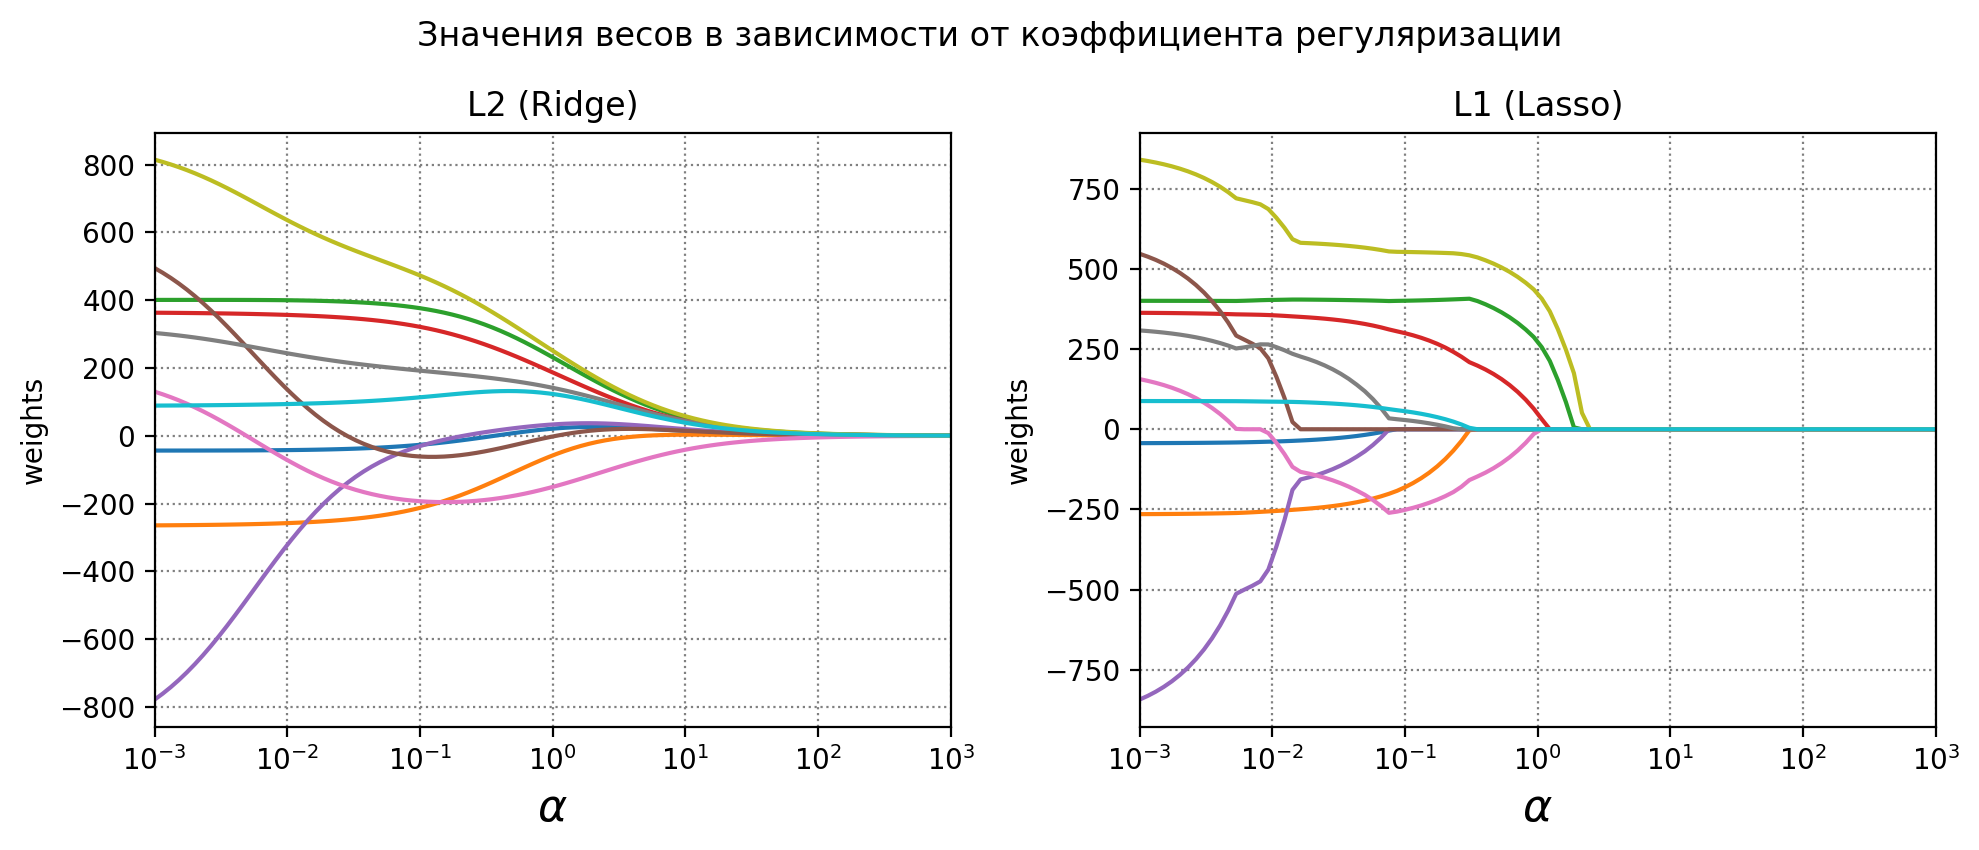

In [5]:
plt.figure(figsize=(10, 4))
plt.suptitle('Значения весов в зависимости от коэффициента регуляризации', y=1.05)
for i, name in enumerate(names):
    plt.subplot(1, 2, i + 1)
    plt.plot(alphas, weights[i])
    plt.xscale('log')
    plt.title(name)
    plt.xlabel(r'$\alpha$', fontsize=16)
    plt.ylabel('weights')
    plt.xlim(alphas[[0, -1]])
    plt.minorticks_off()
plt.tight_layout()

<font color=blue>Как видим, с некоторого момента с ростом $\alpha$ все веса уменьшаются по асболютной величине. Однако в случае гребневой регрессии они только стремятся к нулю, в то время как «Лассо» их в какой-то момент обнуляет. Убедиться в этом также можно, рассмотрев веса при наибольших $\alpha$:</font>

In [6]:
for i, name in enumerate(names):
    print(f'{name}, weights on last 10 (maximal) alphas')
    print(weights[i][-10:].round(2), end='\n\n')

L2 (Ridge), weights on last 10 (maximal) alphas
[[ 0.69  0.29  2.22  1.88  0.96  0.79 -1.8   1.96  2.44  1.7 ]
 [ 0.6   0.26  1.94  1.63  0.84  0.69 -1.56  1.71  2.13  1.48]
 [ 0.52  0.22  1.68  1.42  0.73  0.6  -1.36  1.49  1.85  1.29]
 [ 0.46  0.2   1.47  1.24  0.63  0.52 -1.18  1.29  1.61  1.12]
 [ 0.4   0.17  1.28  1.08  0.55  0.46 -1.03  1.13  1.4   0.98]
 [ 0.35  0.15  1.11  0.94  0.48  0.4  -0.9   0.98  1.22  0.85]
 [ 0.3   0.13  0.97  0.82  0.42  0.35 -0.78  0.85  1.06  0.74]
 [ 0.26  0.11  0.84  0.71  0.36  0.3  -0.68  0.74  0.92  0.64]
 [ 0.23  0.1   0.73  0.62  0.32  0.26 -0.59  0.65  0.8   0.56]
 [ 0.2   0.09  0.64  0.54  0.28  0.23 -0.51  0.56  0.7   0.49]]

L1 (Lasso), weights on last 10 (maximal) alphas
[[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0. 

<font color=blue>А что же будет происходить со свободным членом $w_0$?</font>

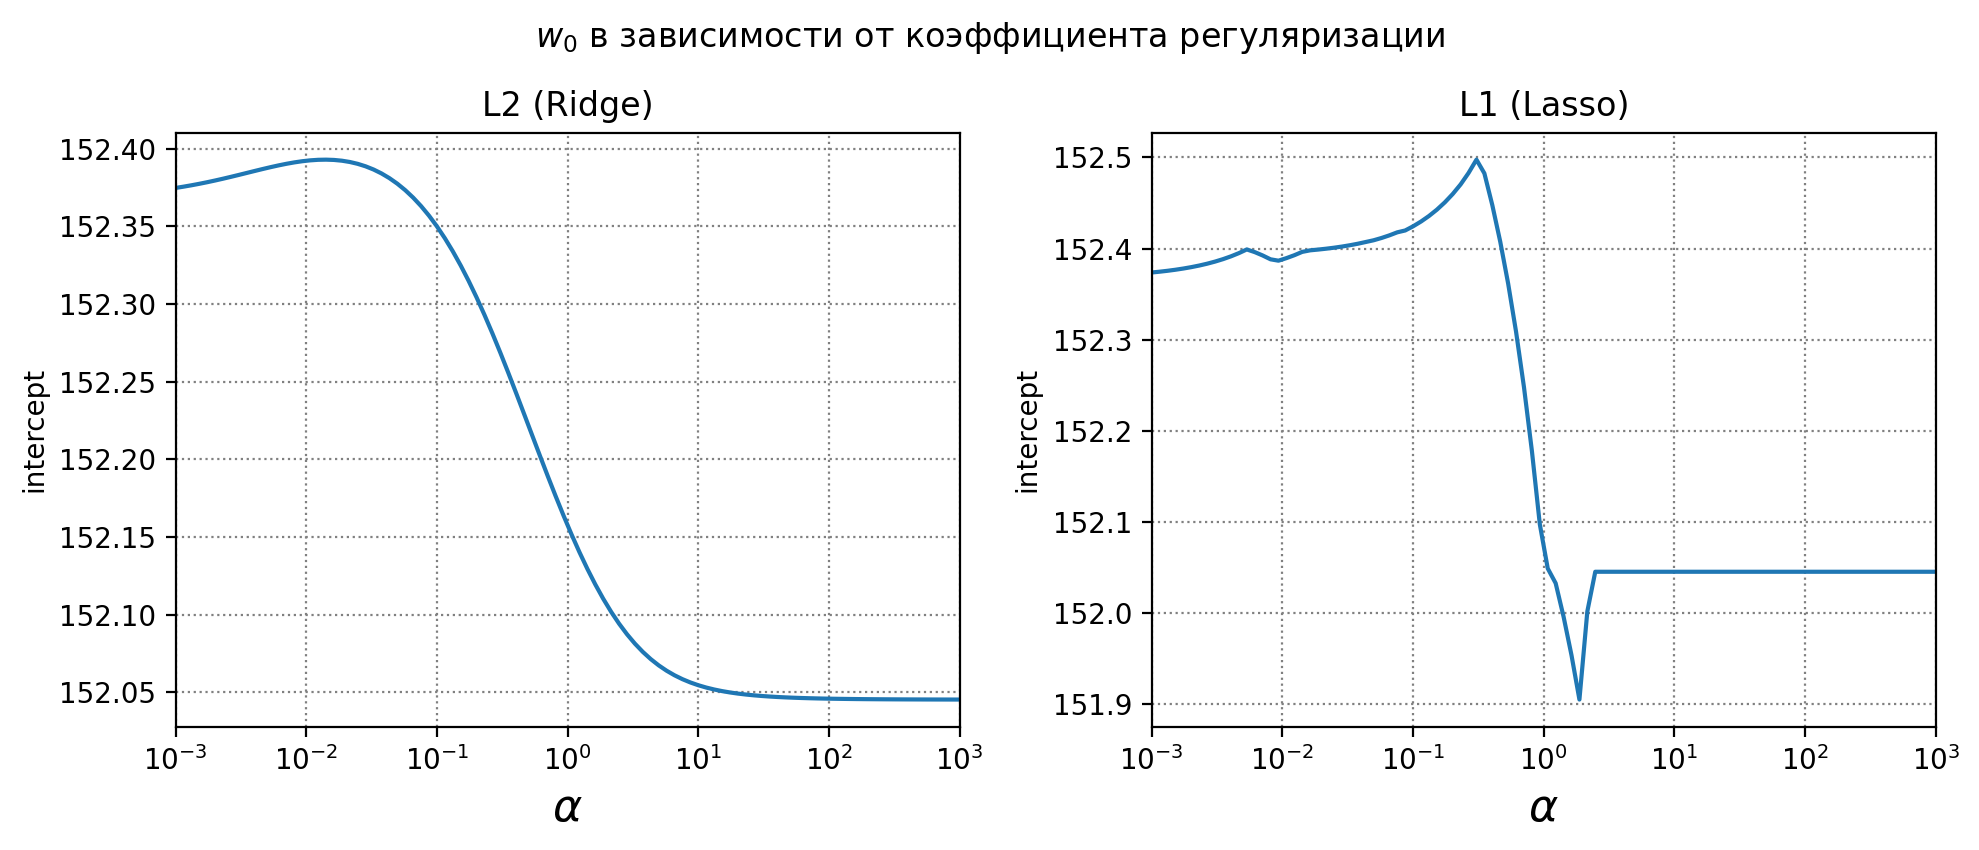

In [7]:
plt.figure(figsize=(10, 4))
plt.suptitle(r'$w_0$ в зависимости от коэффициента регуляризации', y=1.05)

for i, name in enumerate(names):
    plt.subplot(1, 2, i + 1)
    plt.plot(alphas, intercepts[i])
    plt.xscale('log')
    plt.title(name)
    plt.xlabel(r'$\alpha$', fontsize=16)
    plt.ylabel('intercept')
    plt.xlim(alphas[[0, -1]])
    plt.minorticks_off()

plt.tight_layout()

<font color=blue>Ой, с ростом $\alpha$ смещение $w_0$ даже не смотрит в сторону нуля! На самом деле так и должно быть: это связано с тем, что константный признак, фактически отвечающий за сдвиг, в отличие от весов $w_1, w_2 \dots$, не регуляризуется, так как у нас нет оснований для желания приблизить прогноз к нулю. Поэтому графики **числа** нулевых коэффициентов построим только для весов (без $w_0$): </font>

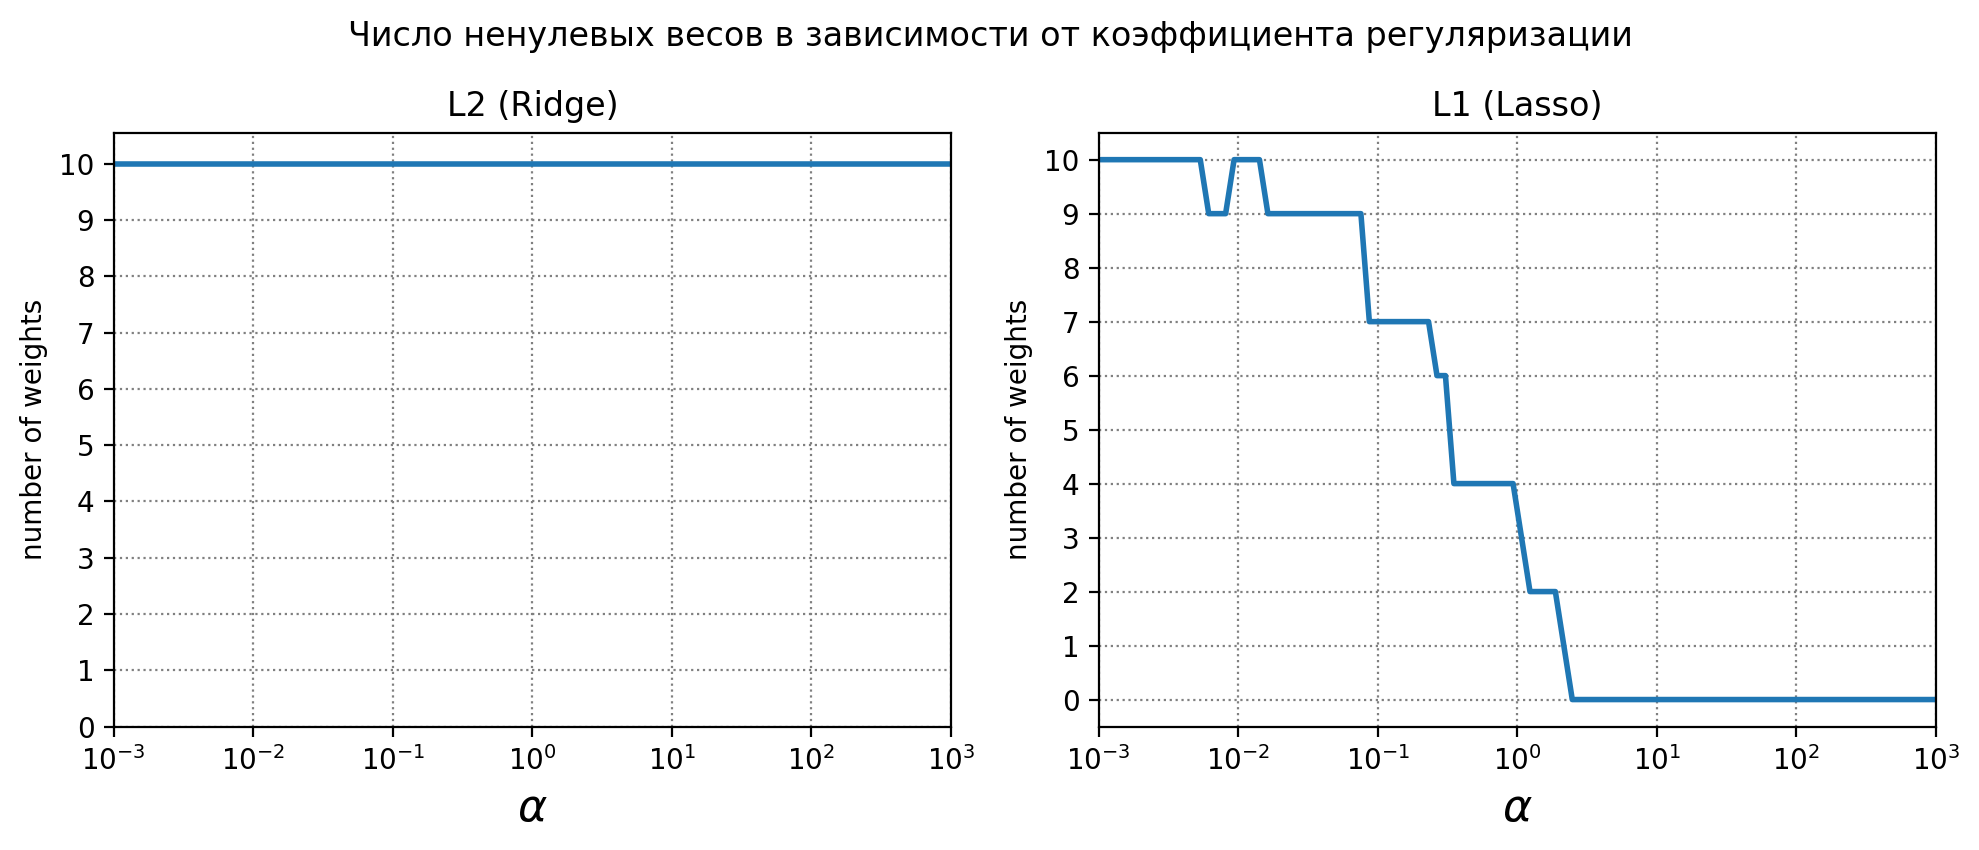

In [8]:
n_zeros = (weights != 0).sum(axis=-1)
plt.figure(figsize=(10, 4))
plt.suptitle('Число ненулевых весов в зависимости от коэффициента регуляризации', y=1.05)
for i, name in enumerate(names):
    plt.subplot(1, 2, i + 1)
    plt.plot(alphas, n_zeros[i], lw=2)
    plt.xscale('log')
    plt.title(name)
    plt.xlabel(r'$\alpha$', fontsize=16)
    plt.ylabel('number of weights')
    plt.xlim(alphas[[0, -1]])
    plt.minorticks_off()
    plt.yticks(np.arange(weights.shape[-1] + 1))
plt.tight_layout()

<font color=blue>При гребневой регрессии коэффициенты хоть и стремятся к нулю, но не обнуляются в отличие от «Лассо». Поэтому разумно также посмотреть _близость_ к нулю, которую мы определим как «не превосходит 1 по абсолютной величине»:</font>

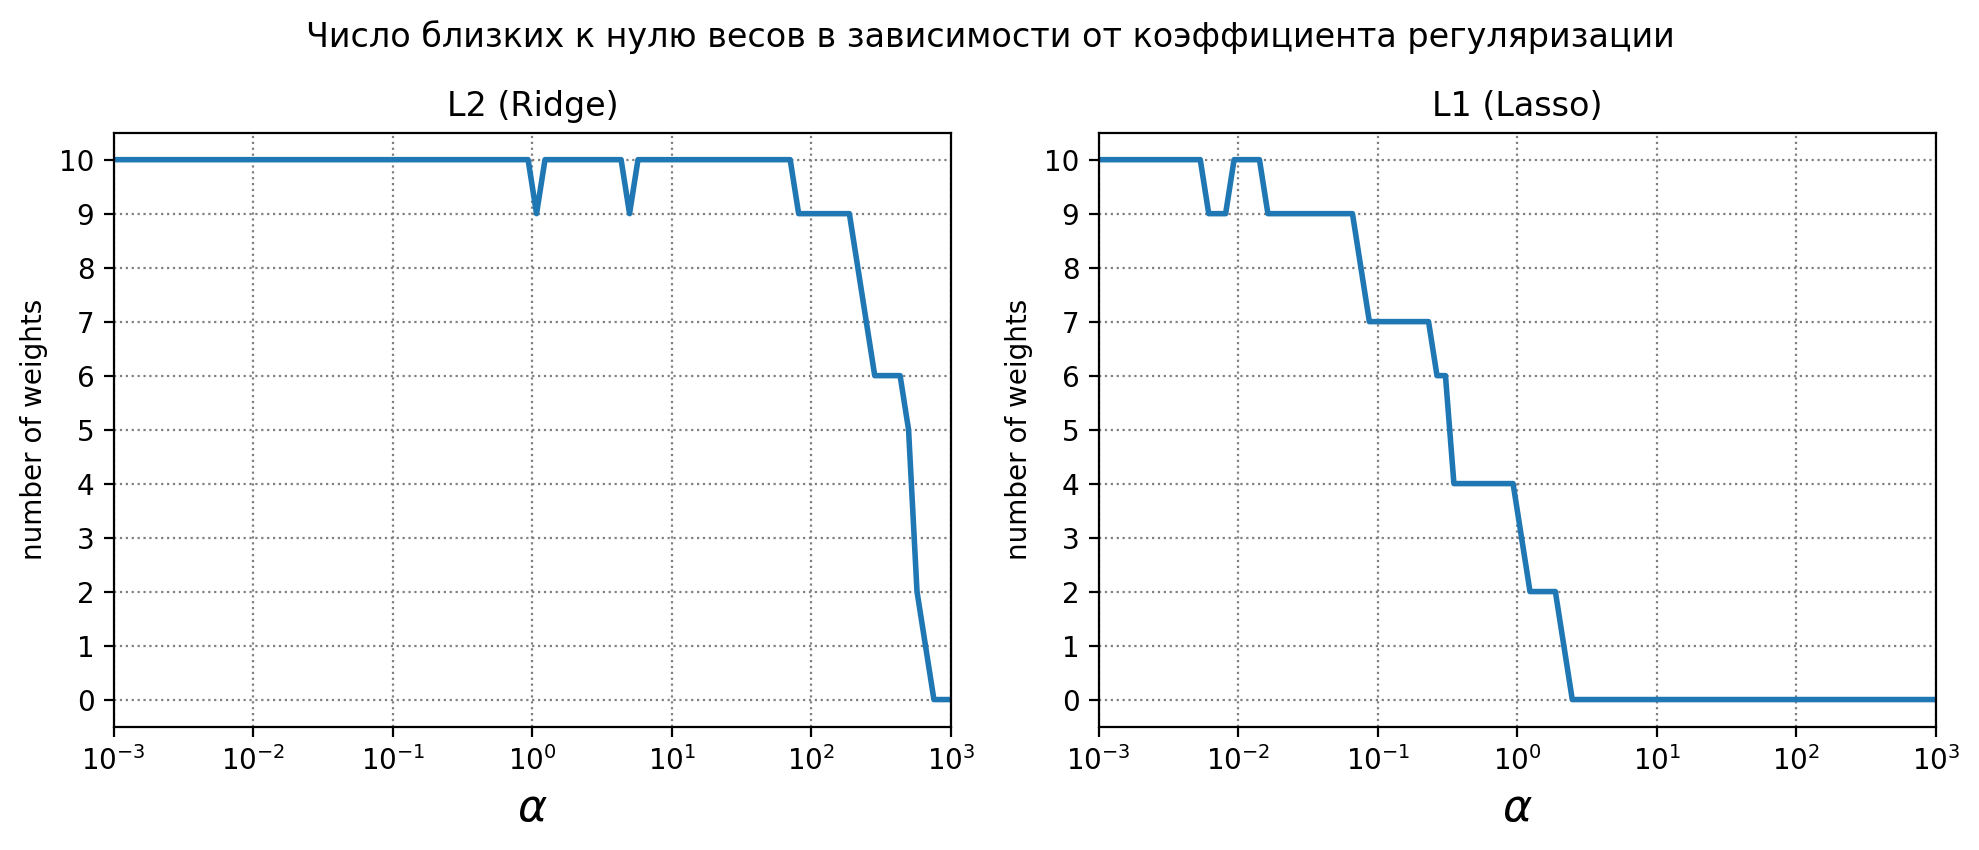

In [9]:
n_almost_zeros = (np.abs(weights) > 1).sum(axis=-1)
plt.figure(figsize=(10, 4))
plt.suptitle('Число близких к нулю весов в зависимости от коэффициента регуляризации', y=1.05)
for i, name in enumerate(names):
    plt.subplot(1, 2, i + 1)
    plt.plot(alphas, n_almost_zeros[i], lw=2)
    plt.xscale('log')
    plt.title(name)
    plt.xlabel(r'$\alpha$', fontsize=16)
    plt.ylabel('number of weights')
    plt.xlim(alphas[[0, -1]])
    plt.minorticks_off()
    plt.yticks(np.arange(weights.shape[-1] + 1))
plt.tight_layout()

<font color=blue>Вот, теперь получили более осмысленные результаты для $L_2$, в то время как для «Лассо» близость к нулю обычно означает непосредственно зануление — это видно и из графика «Значения весов в зависимости от коэффициента регуляризации»: при $L_1$ коэффициенты зануляются очень резко.</font>

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

<font color=blue>Не указывается, на какой выборке в данный момент нужно считать метрики. Посчитаем для теста, предварительно обучив гребневую регрессию с параметрами по умолчанию ($\alpha=1$) на трейне:</font>

In [10]:
y_pred = Ridge().fit(X_train, y_train).predict(X_test)

<font color=blue>Посчитаем метрики:</font>

In [11]:
from functools import partial
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

rmse = partial(mse, squared=False)
metrics = [rmse, mae, r2_score]
metric_names = ['RMSE', 'MAE', 'R2']
before_tuning = pd.DataFrame(index=metric_names, columns=[r'with default $\alpha$ = 1'])

for name, metric in zip(metric_names, metrics):
    before_tuning.loc[name] = metric(y_test, y_pred)
before_tuning

,with default $\alpha$ = 1
RMSE,58.3044
MAE,49.6028
R2,0.359899


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

<font color=blue>В `GridSearchCV` возьмем 5 фолдов. С метриками качества регрессии есть несколько нюансов: коэффициент детерминации $R^2$ — не функция потерь, в отличие от $RMSE$ и $MAE$. И гридсерч как раз принимает не функции потерь, а scorer'ы (функционалы качества).</font>

In [12]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer

scorings = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'r2',
]
cv = KFold(n_splits=5, shuffle=True, random_state=0)
best_results = pd.DataFrame(index=metric_names,
                       columns=[r'best $\alpha$', 'metric value'])
cv_results = {}

for scorer, name, metric in zip(scorings, metric_names, metrics):
    gs = GridSearchCV(Ridge(), param_grid={'alpha': alphas},
                      scoring=scorer, n_jobs=-1, cv=cv)
    gs.fit(X_train, y_train)
    best_results.loc[name, r'best $\alpha$'] = gs.best_params_['alpha']
    best_results.loc[name, 'metric value'] = metric(y_test, gs.predict(X_test))
    cv_results[name] = gs.cv_results_['mean_test_score']

cv_results['RMSE'] *= -1
cv_results['MAE'] *= -1

best_alpha = best_results.loc['RMSE', r'best $\alpha$']

<font color=blue>Построим графики:</font>

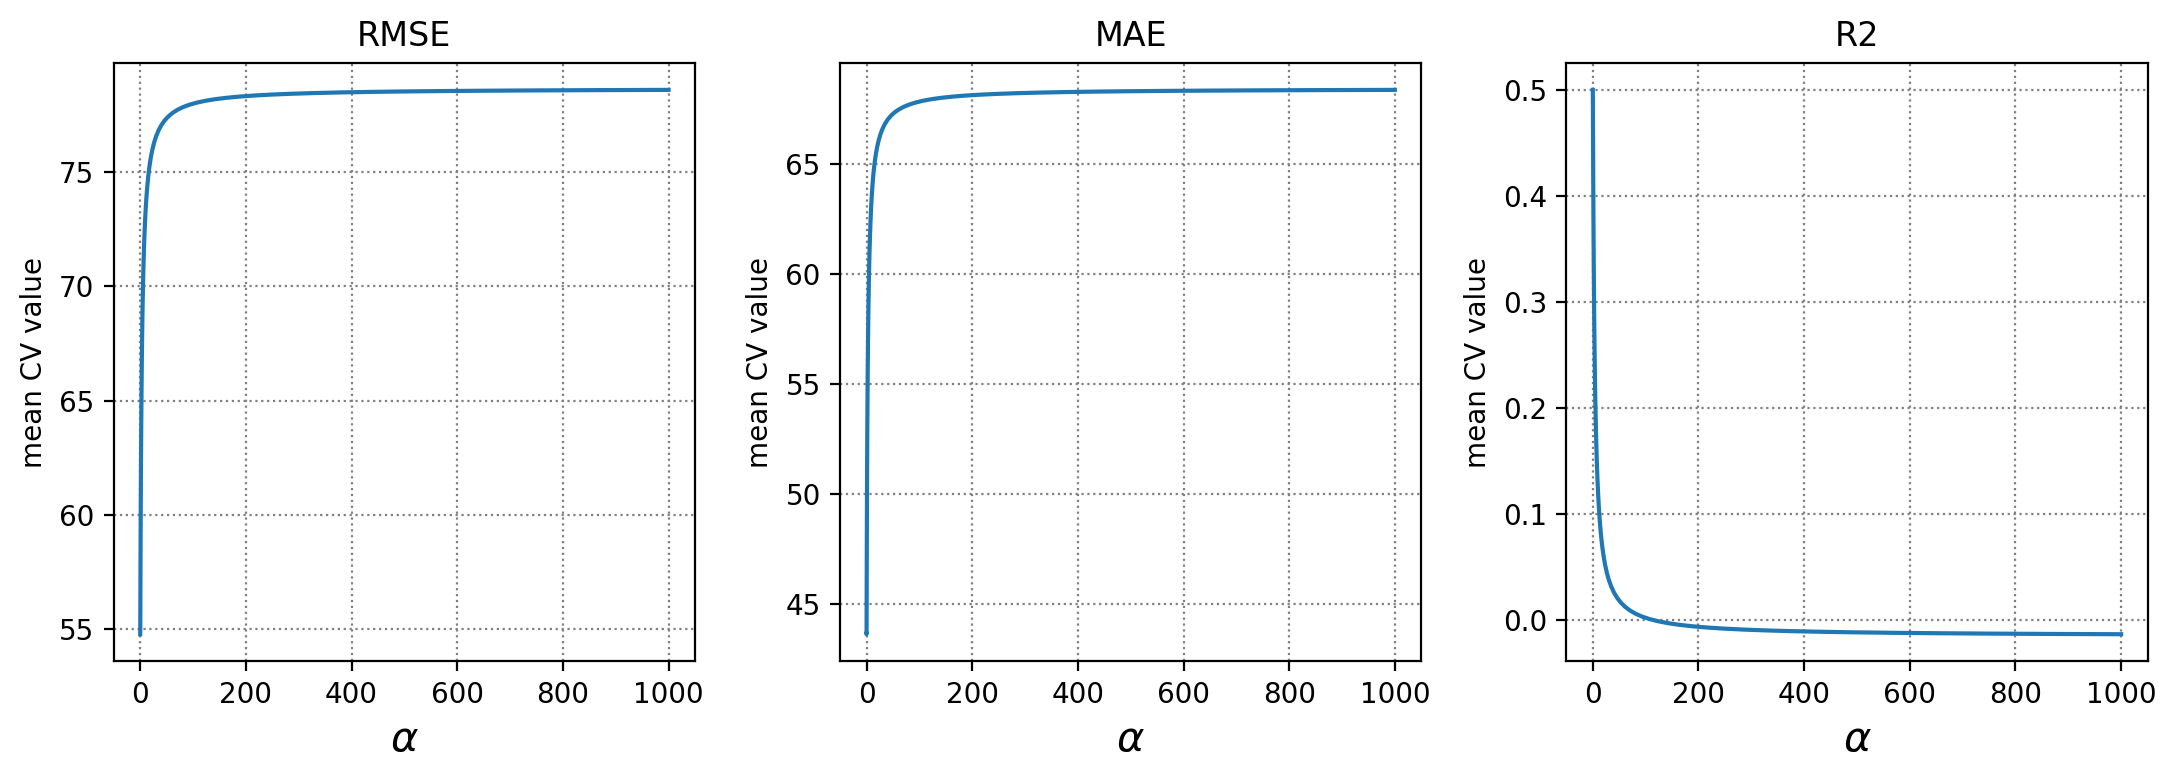

In [13]:
plt.figure(figsize=(11, 4))
for i, name in enumerate(cv_results):
    plt.subplot(1, 3, i+1)
    plt.plot(alphas, cv_results[name])
    plt.title(name)
    plt.xlabel(r'$\alpha$', fontsize=15)
    plt.ylabel('mean CV value')

plt.tight_layout()

<font color=blue>Получается, в данной задаче модель лучше работает со слабой регуляризацией. Выведем лучшие $\alpha$ и значения метрик уже на тестовой выборке (для сравнения в последнем столбце приводятся ранее полученные значения при дефолтном параметре):</font>

In [14]:
pd.concat([best_results, before_tuning], axis=1)\
  .style.highlight_max(axis=1, subset='metric value')\
  .set_precision(3)

,best $\alpha$,metric value,with default $\alpha$ = 1
RMSE,0.001,55.858,58.304
MAE,0.005,47.072,49.603
R2,0.001,0.412,0.360


<font color=blue>Качество улучшилось во всех случаях! При этом из результатов следует, что лучшим образом модель ведет себя при слабой регуляризации.</font>

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

<font color=blue>Далее в гребневой регрессии будем использовать подобранное (для (R)MSE) по кросс-валидации значение $\alpha.$</font>

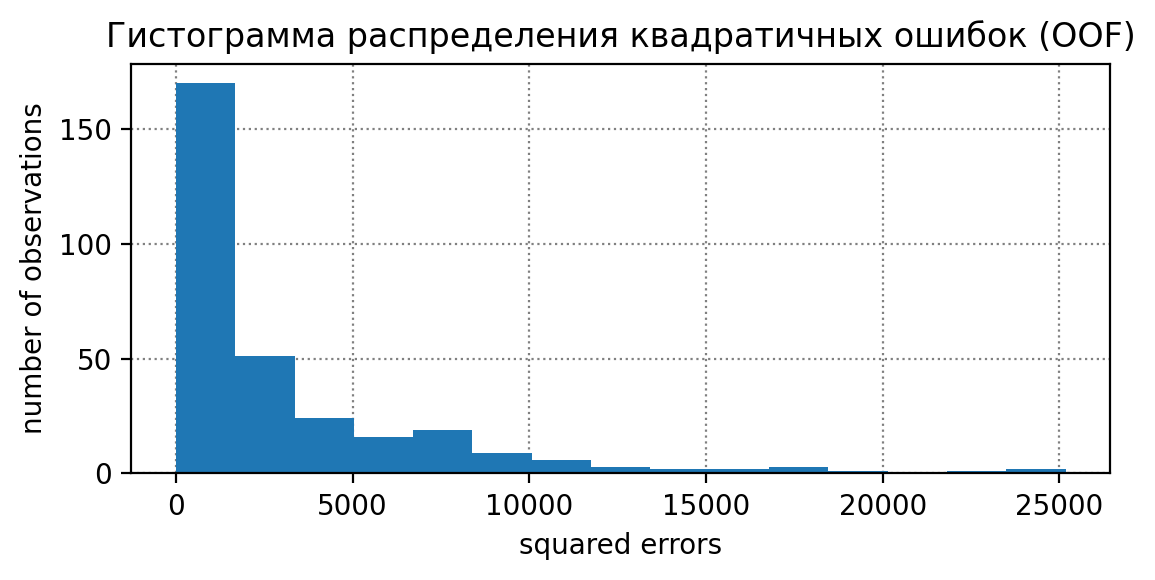

In [15]:
from sklearn.model_selection import cross_val_predict

cv = KFold(n_splits=5, shuffle=True, random_state=0)

y_pred = cross_val_predict(Ridge(alpha=best_alpha), X_train, y_train, cv=cv, n_jobs=-1)
mistakes = (y_train - y_pred) ** 2
plt.figure(figsize=(6, 3))
plt.title('Гистограмма распределения квадратичных ошибок (OOF)')
plt.hist(mistakes, bins=15)
plt.xlabel('squared errors')
plt.ylabel('number of observations')
plt.tight_layout()

<font color=blue>Гистограмма показывает, что на некоторых объектах — выбросах — ошибка чересчур велика. Причем в распределении по бинам не наблюдается четкого уменьшения числа объектов с ростом ошибки.</font>

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

<font color=blue>Выбросами будем считать объекты с квадратичной ошибкой >3000.</font>

In [16]:
print(f"RMSE (before removing outliers): {best_results.loc['RMSE', 'metric value']:.2f}")

clean_mask = mistakes <= 3000
model = Ridge(alpha=best_alpha)
y_pred = model.fit(X_train[clean_mask], y_train[clean_mask]).predict(X_test)
print(f'RMSE (after removing outliers): {rmse(y_test, y_pred):.2f}')

RMSE (before removing outliers): 55.86
RMSE (after removing outliers): 55.48


<font color=blue>После удаления выбросов из обучающей выборки качество **улучшилось** — выбросы действительно негативно влияют на прогноз. Но важно отметить, что порог имеет значение. Если мы выберем слишком маленький (большое), то качество может стать хуже (демонстрируется в клетке ниже). Более того, как отмечено в задании, при таком подходе мы не решаем проблемы выбросов на тестовой выборке.</font>

In [17]:
for threshold in [1000, 10000]:
    clean_mask = mistakes <= threshold
    y_pred = model.fit(X_train[clean_mask], y_train[clean_mask]).predict(X_test)
    print(f'threshold: {threshold}')
    print(f'RMSE after removing outliers: {rmse(y_test, y_pred):.2f}\n')

threshold: 1000
RMSE after removing outliers: 55.96

threshold: 10000
RMSE after removing outliers: 56.98



## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [18]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [19]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual=False)  # n_samples >> n_features
model.fit(X_train, y_train)
y_score = model.decision_function(X_test)

<font color=blue>Подчеркнем профит решения прямой задачи оптимизации (`dual`=False) для наших данных. По умолчанию LinearSVC решает двойственную, что в данном случае происходит медленнее в $\approx$40 раз и не сходится без увеличения числа итераций:</font>

In [20]:
%timeit LinearSVC(dual=False).fit(X_train, y_train)
%timeit -r1 -n1 LinearSVC().fit(X_train, y_train)

482 ms ± 6.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [21]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)

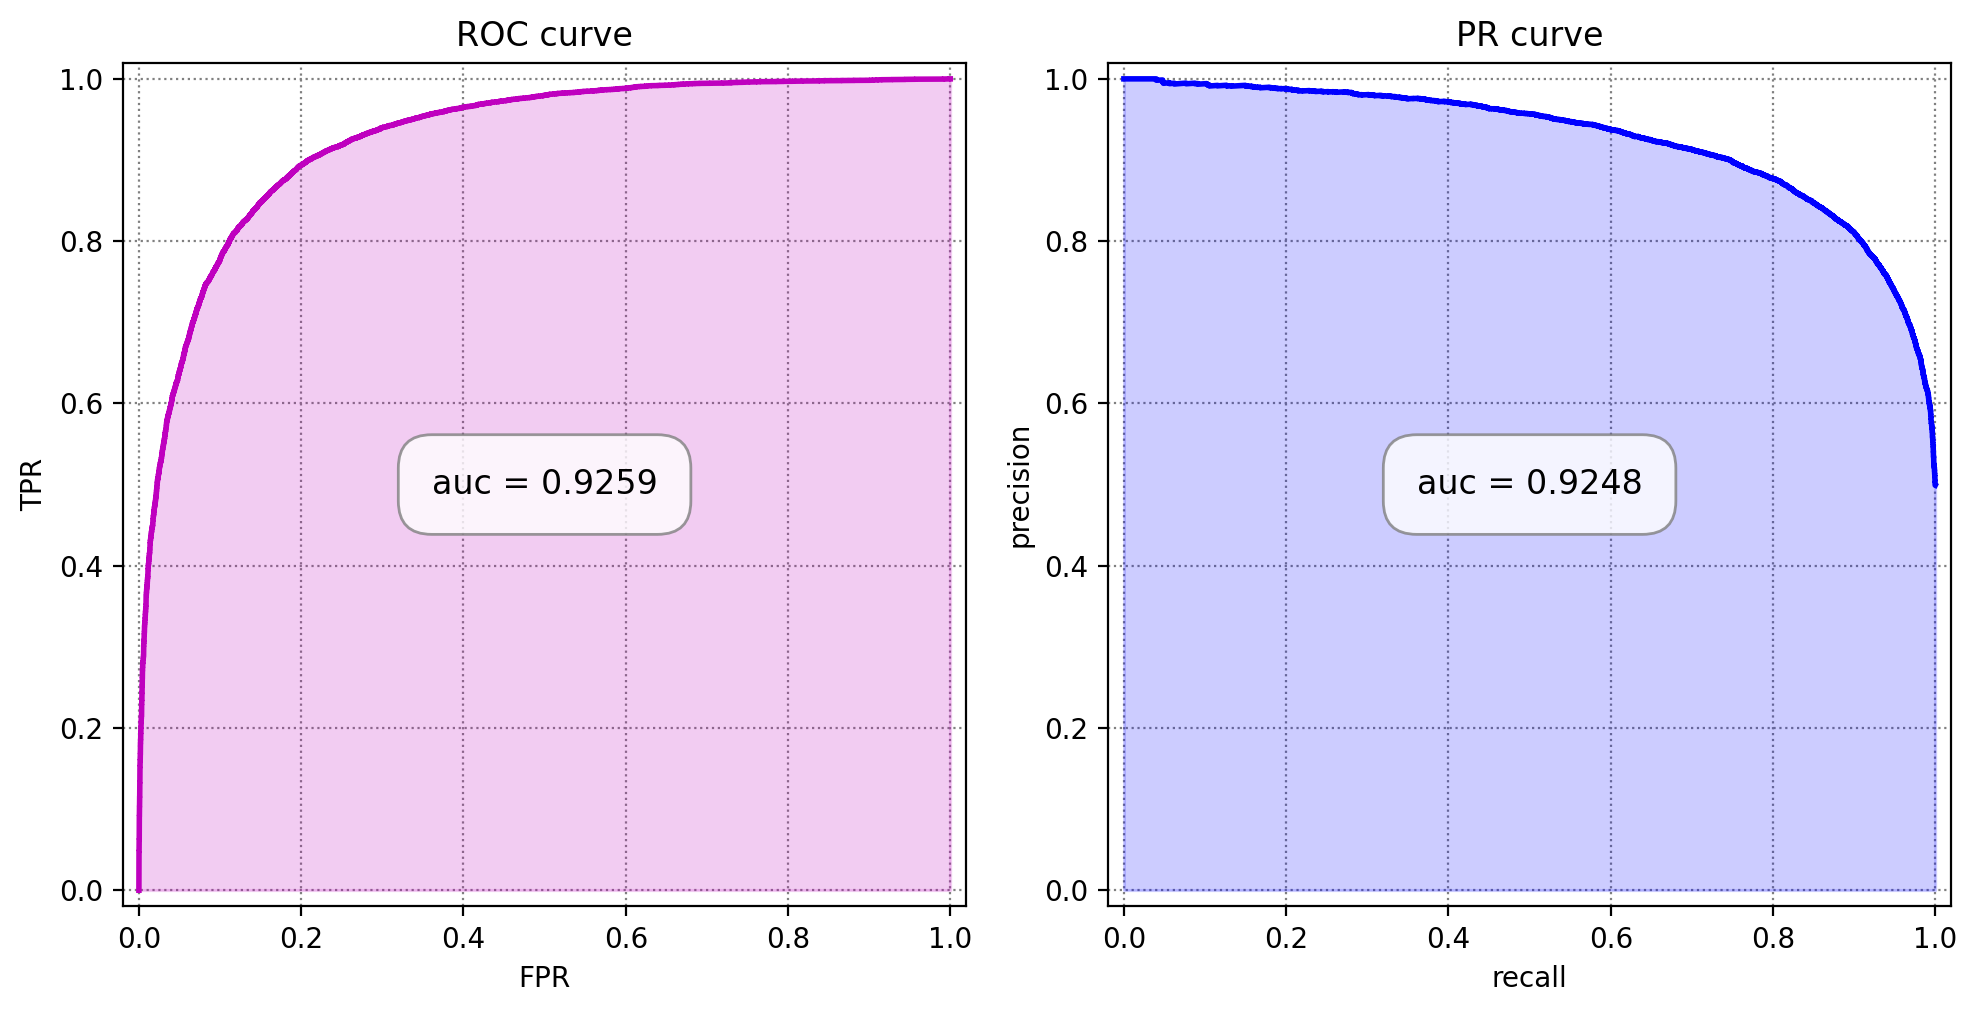

In [22]:
box_props = dict(boxstyle='round,pad=1', fc='w', ec='grey', lw=1, alpha=0.8)

def vis_curve(ax, title, x, y, c, xlabel, ylabel):
    ax.set_title(title)
    ax.plot(x, y, lw=2, color=c)
    ax.fill_between(x, y, alpha=0.2, color=c)
#     ax.set_ylim([0, 1])
#     ax.set_xlim([0, 1])
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.set_aspect('equal')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.text(0.5, 0.5, f'auc = {auc(x, y):.4f}', fontsize='large',
            ha='center', va='center', bbox=box_props)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
vis_curve(axes[0], 'ROC curve', fpr, tpr, 'm', 'FPR', 'TPR')
vis_curve(axes[1], 'PR curve', recall, precision, 'b', 'recall', 'precision')


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

<font color=blue>Визуализируем SVM согласно условию. </font>

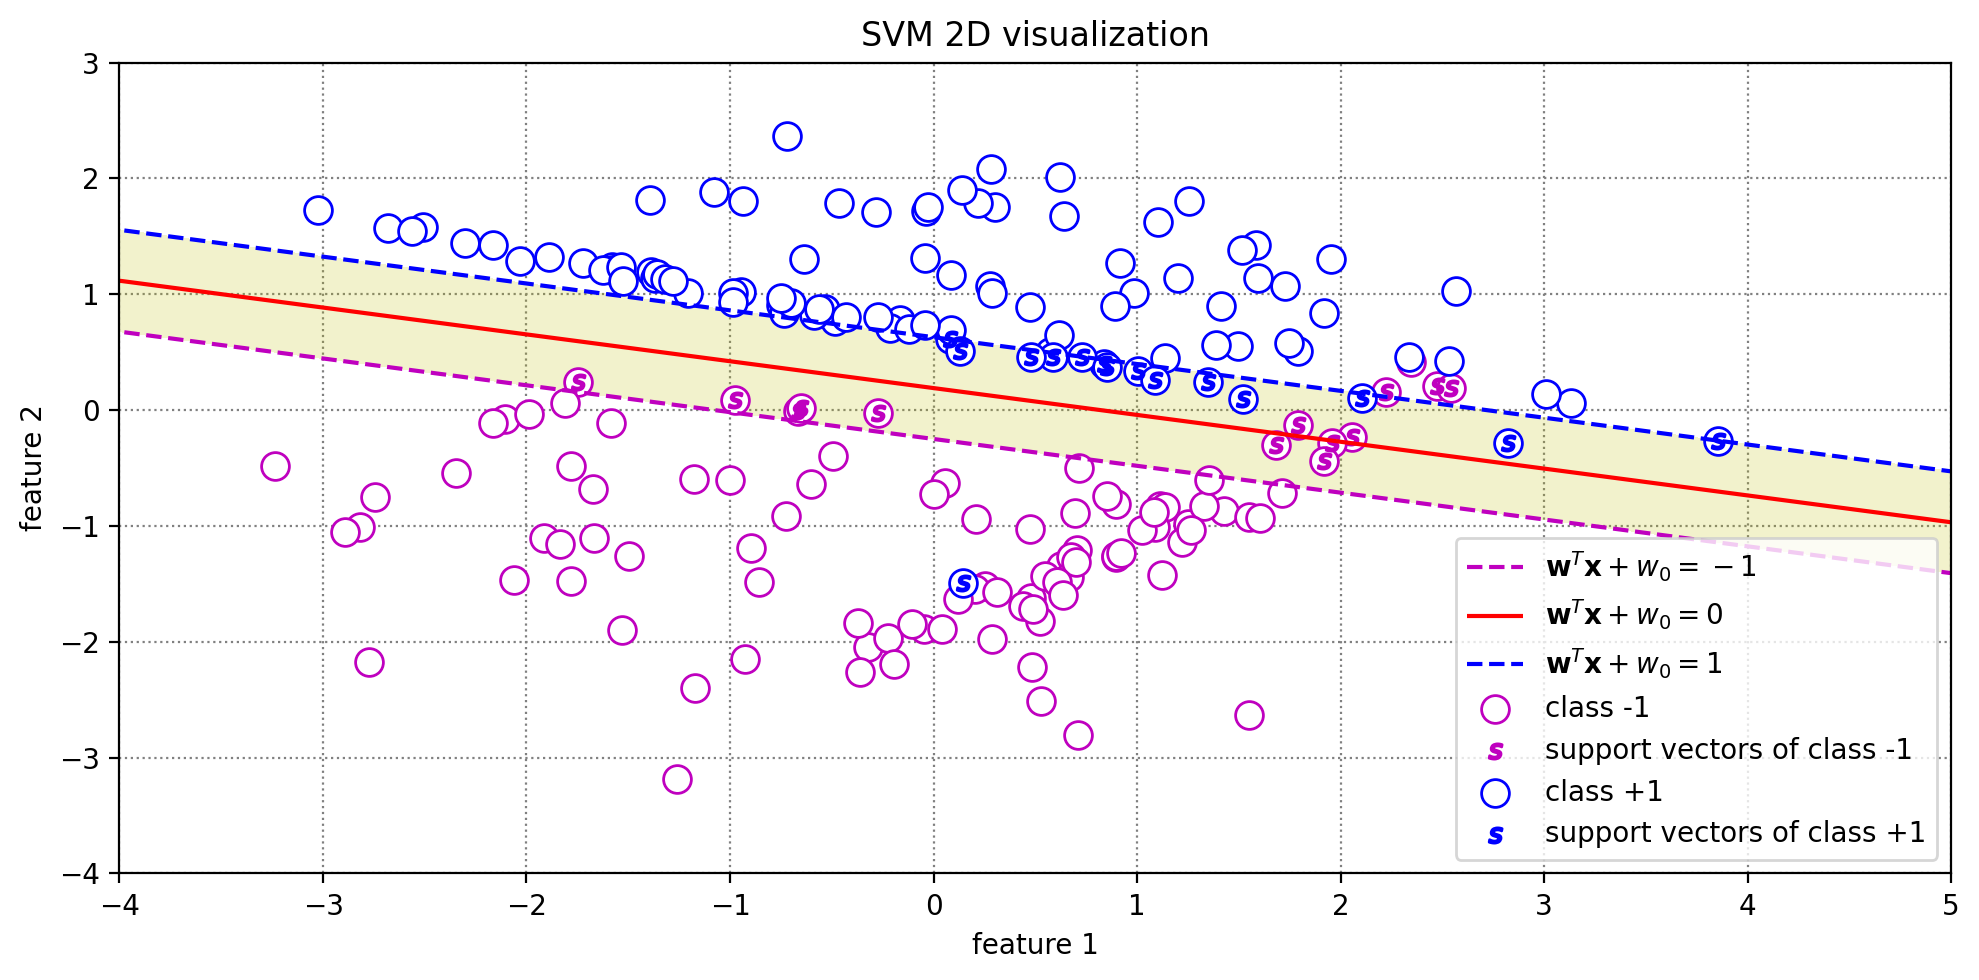

In [23]:
from sklearn.svm import SVC

X_2d, classes = make_classification(n_samples=200, n_features=2, random_state=20,
                                    n_informative=2, n_redundant=0)
classes = 2 * classes - 1
model = SVC(kernel='linear', random_state=0)
model.fit(X_2d, classes)

feature1, feature2 = np.split(X_2d, 2, axis=1)
plt.figure(figsize=(10, 5), dpi=200)

# Idea with contour lines taken from
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
XX, YY = np.meshgrid(np.linspace(-10, 10, 4), np.linspace(-10, 10, 4))
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contourf(XX, YY, Z, colors='y', levels=[-1, 0, 1], alpha=0.2)
cls = plt.contour(XX, YY, Z, colors=['m', 'r', 'b'], levels=[-1, 0, 1],
                 linestyles=['--', '-', '--'])

for cl, i in zip(cls.collections, [-1, 0, 1]):
    cl.set_label(r'$\mathbf{w}^T \mathbf{x}+w_0=' + str(i) + '$')

for class_, color in zip([-1, 1], ['m', 'b']):
    c_inds = (classes == class_).nonzero()[0]
    support_inds = np.intersect1d(c_inds, model.support_)
    plt.scatter(feature1[c_inds], feature2[c_inds], marker='o', label=f'class {class_:+}',
                linewidth=1, facecolors='white', edgecolors=color, s=100)
    plt.scatter(feature1[support_inds], feature2[support_inds], facecolor=color, marker='$s$',
                label=f'support vectors of class {class_:+}', s=30)

plt.title('SVM 2D visualization')
plt.xlim([-4, 5])
plt.ylim([-4, 3])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')
plt.tight_layout()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [24]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        # - -> +
        bin_middle_points.append((l + r) / 2)
        # min -> mean
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

<font color=blue>Далее для графиков будет удобно немножко изменить (дописать) функцию.</font>

In [25]:
def custom_plot_calibration_curve(y_test, preds, n_bins=20,
                                  name=None, color=None):
    bin_middle_points = []
    bin_real_ratios = []
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, marker='o',
             label=name, color=color)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [26]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

<font color=blue>Обучим модели. Наивные оценки вероятностей для метода опорных векторов получим с помощью линейного отображения уверенностей SVM'а на диапазон [0, 1] (это обычно называют min-max scaling, normalization, range scaling реже standartization).</font>

In [27]:
from sklearn.linear_model import LogisticRegression

model = LinearSVC(dual=False)  # n_samples >> n_features
model.fit(X_train, y_train)
y_svm_score = model.decision_function(X_test)
y_svm_proba = (y_svm_score - y_svm_score.min()) / (y_svm_score.max() - y_svm_score.min())

model = LogisticRegression()
model.fit(X_train, y_train)
y_logreg_proba = model.predict_proba(X_test)[:, 1]

<font color=blue>Построим калибровочные кривые. Ранее мы исправили функцию для их построения, но сейчас воспользуемся библиотечной (поскольку. Также выделим сами точки, соответствующие бинам. </font>

In [28]:
def plot_calib_hist(n_bins=20):
    plt.figure(figsize=(11, 4.5))
    grid = np.linspace(0, 1, 11)  # 20 is too dense
    plt.subplot(121, aspect='equal')
    custom_plot_calibration_curve(y_test, y_svm_proba, n_bins=n_bins,
        name='SVM', color='b')
    custom_plot_calibration_curve(y_test, y_logreg_proba, n_bins=n_bins,
        name='logistic regression', color='m')
    plt.plot([0, 1], color='grey', linestyle='--',
             label='perfect calibration')
    plt.legend()
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xticks(grid)
    plt.yticks(grid)
    plt.title('Calibration curves')
    plt.xlabel('predicted probability')
    plt.ylabel('fraction of positives')
    plt.subplot(122)
    plt.hist([y_svm_proba, y_logreg_proba], color=['b', 'm'],
             bins=n_bins, label=['SVM', 'logistic regression'])
    plt.xlim([0, 1])
    plt.legend()
    plt.xticks(grid)
    plt.xlabel('predicted probability')
    plt.ylabel('number of samples')
    plt.title('Histograms')
    plt.tight_layout()

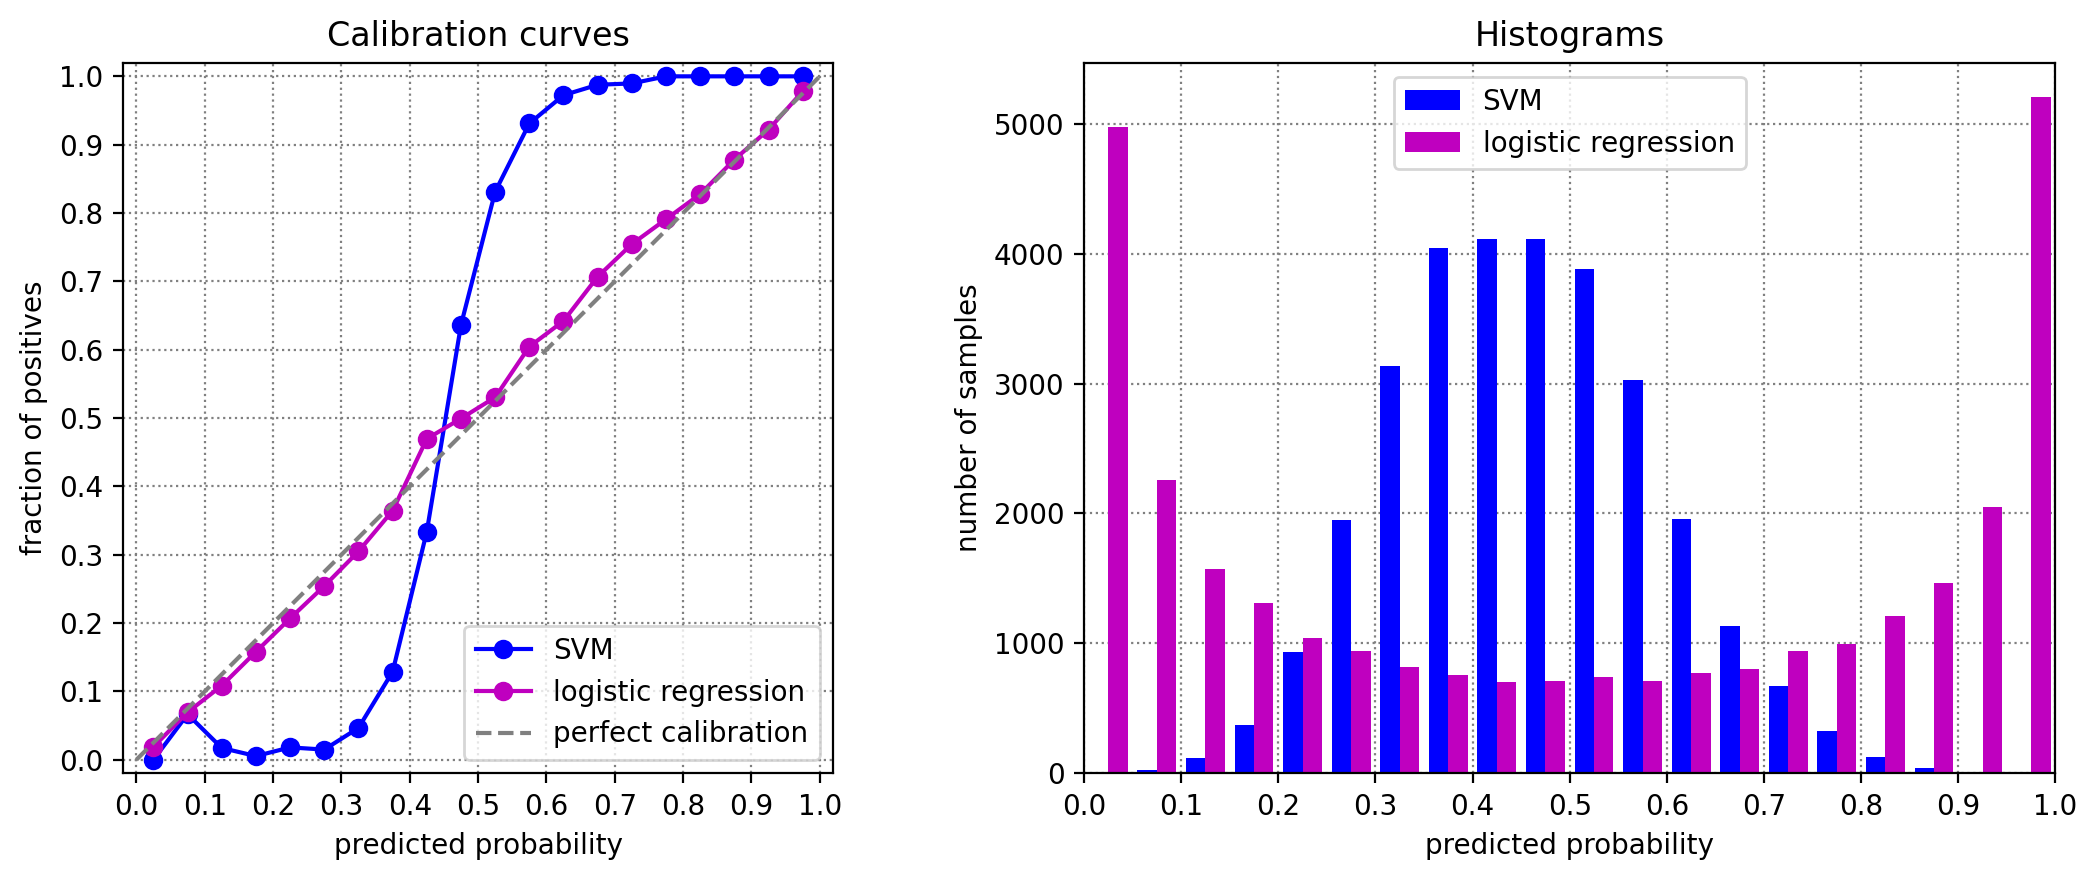

In [29]:
plot_calib_hist()

<font color=grey><i>(Не подписываем полностью сетку из 20 бинов, потому что даже с поворотом получается слишком плотно)</i></font>

<font color=blue>**Что мы видим!** Логистическая регрессия выдает хорошо откалиброванные ответы (ведь она и минимизирует логлосс). А вот SVM — нет: на маленьких вероятностях он страдает переуверенностью, в то время как на больших значениях — недостаточной уверенностью. Заметим, что кривая близка к сигмоиде.</font>
    
<font color=blue>**Что же делать?** Один из самых популярных методов калибровки — калибровка Платта. На самом деле она была предложена [именно для SVM](http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.41.1639). Метод заключается в том, что ответы SVM'a не нормализуются на [0, 1], а деформируются с помощью сигмоиды (с двумя параметрамми: масштаба и сдвига — они подбираются с помощью MLE на специальной отложенной выборке или по кросс валидации). Применим алгоритм как раз в следующем задании.</font>

<font color=blue>**Что касается гистограмм:** они отличаются! Ответы логистической регрессии более «крайние», то есть близкие к 0 и 1 (интуитивно это связано с формой сигмоиды, фактически — с минимизацией логлосса), в то время как значительная часть ответов SVM распределена вблизи центра — это говорит о том, что в выборке много «объектов-нарушителей».</font>

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [30]:
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(LinearSVC(dual=False), method='sigmoid')
model.fit(X_train, y_train)
y_svm_proba = model.predict_proba(X_test)[:, 1]

<font color=blue>Визуализируем откалиброванный SVM, оставив для сравнения логистическую регрессию. (И заметим, что эксперимент демонстрирует схожесть предсказаний вероятностей, получаемых с помощью логистической регрессии и откалиброванного той же сигмоидой SVM. Вообще комбинация (SVM + сигмоида) близка к логистической регрессии).</font>

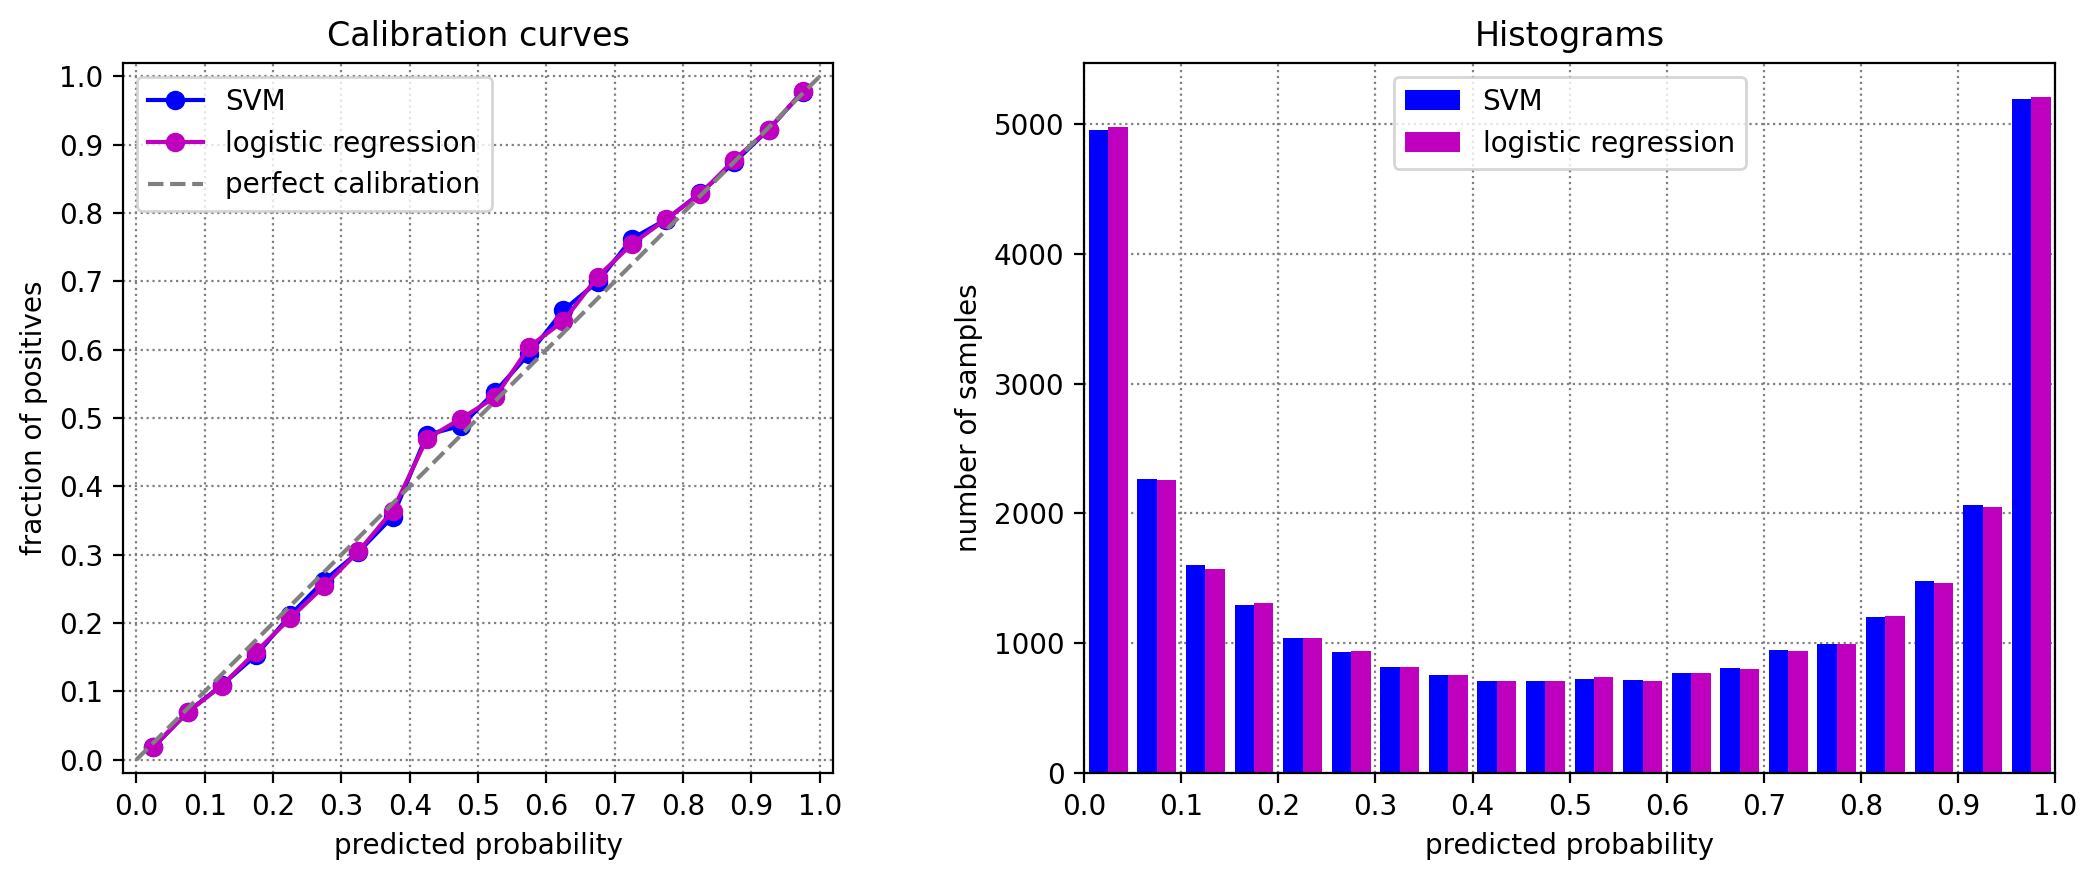

In [31]:
plot_calib_hist()

<font color=blue>Ну вот! SVM действительно отлично калибруется настроенной сигмоидой.</font>

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

<font color=blue>Так, мы уже знаем, что для SVM отлично подходит калибровка Платта (пропуск через сигмоиду) — возможно, это лучший алгоритм в данном случае.</font>

<font color=blue>Один из самых простых и универсальных метод калибровки — histogram binning (обзор этого и других методов можно найти <a href='https://dyakonov.org/2020/03/27/%D0%BF%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0-%D0%BA%D0%B0%D0%BB%D0%B8%D0%B1%D1%80%D0%BE%D0%B2%D0%BA%D0%B8-%D1%83%D0%B2%D0%B5%D1%80%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8/'>здесь</a> и <a href='https://arxiv.org/abs/1706.04599'>здесь</a>). Идея: в каждом бине мы подменяем ответы алгоритма некоторым значением ($\theta_m$), чтобы минимизировать итоговые отклонения от корректных вероятностей. В соответствии с нашим заданием это формализуется так:</font>

<font color=blue>$$
\mathbf{\theta} = \arg \min_{\mathbf{\theta}} 
\sum_{m=1}^{M} 
\sum_{i=1}^{n} 
[a_i \in B_m] (y_i-\theta_m)^2
$$</font>

<font color=blue>где $a_i, y_i$ — вероятность, выдавыемая алгоритмом и истинная метка $i$-го объекта, ${B_1,\dots,B_M}$ — бины, квадратными скобками обозначен индикатор. Бины возьмем равной ширины. Заметим, что решение задачи можно выразить явно: $\theta_m$ соответствует среднее значение объектов положительного класса, попавших в $B_m$.</font>

In [32]:
def custom_plot_calibration_curve(y_test, preds, n_bins=20,
                                  name=None, color=None):
    bin_middle_points = []
    bin_real_ratios = []
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, marker='o',
             label=name, color=color)

In [33]:
class HistogramBinner:
    def __init__(self, n_bins, normalize=True):
        self.bins = np.linspace(0, 1, n_bins + 1)
        self.n_bins = n_bins
        self.thetas = None
        self.normalize = normalize
    
    def fit(self, y_true, y_conf):
        if self.normalize:
            y_conf = (y_conf - y_conf.min()) / (y_conf.max() - y_conf.min())
        thetas = []
        for l, r in zip(self.bins, self.bins[1:]):
            thetas.append(y_true[(l <= y_conf) & (y_conf <= r)].mean())
        thetas.append(thetas[-1])
        self.thetas = np.array(thetas)
        return thetas

    def transform(self, y_conf):
        if self.normalize:
            y_conf = (y_conf - y_conf.min()) / (y_conf.max() - y_conf.min())
        return self.thetas[np.digitize(y_conf, self.bins) - 1]

In [34]:
model = LinearSVC(dual=False)  # n_samples >> n_features
model.fit(X_train, y_train)
hb = HistogramBinner(50)
hb.fit(y_train, model.decision_function(X_train))

y_svm_score = model.decision_function(X_test)
y_svm_proba = hb.transform(y_svm_score)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


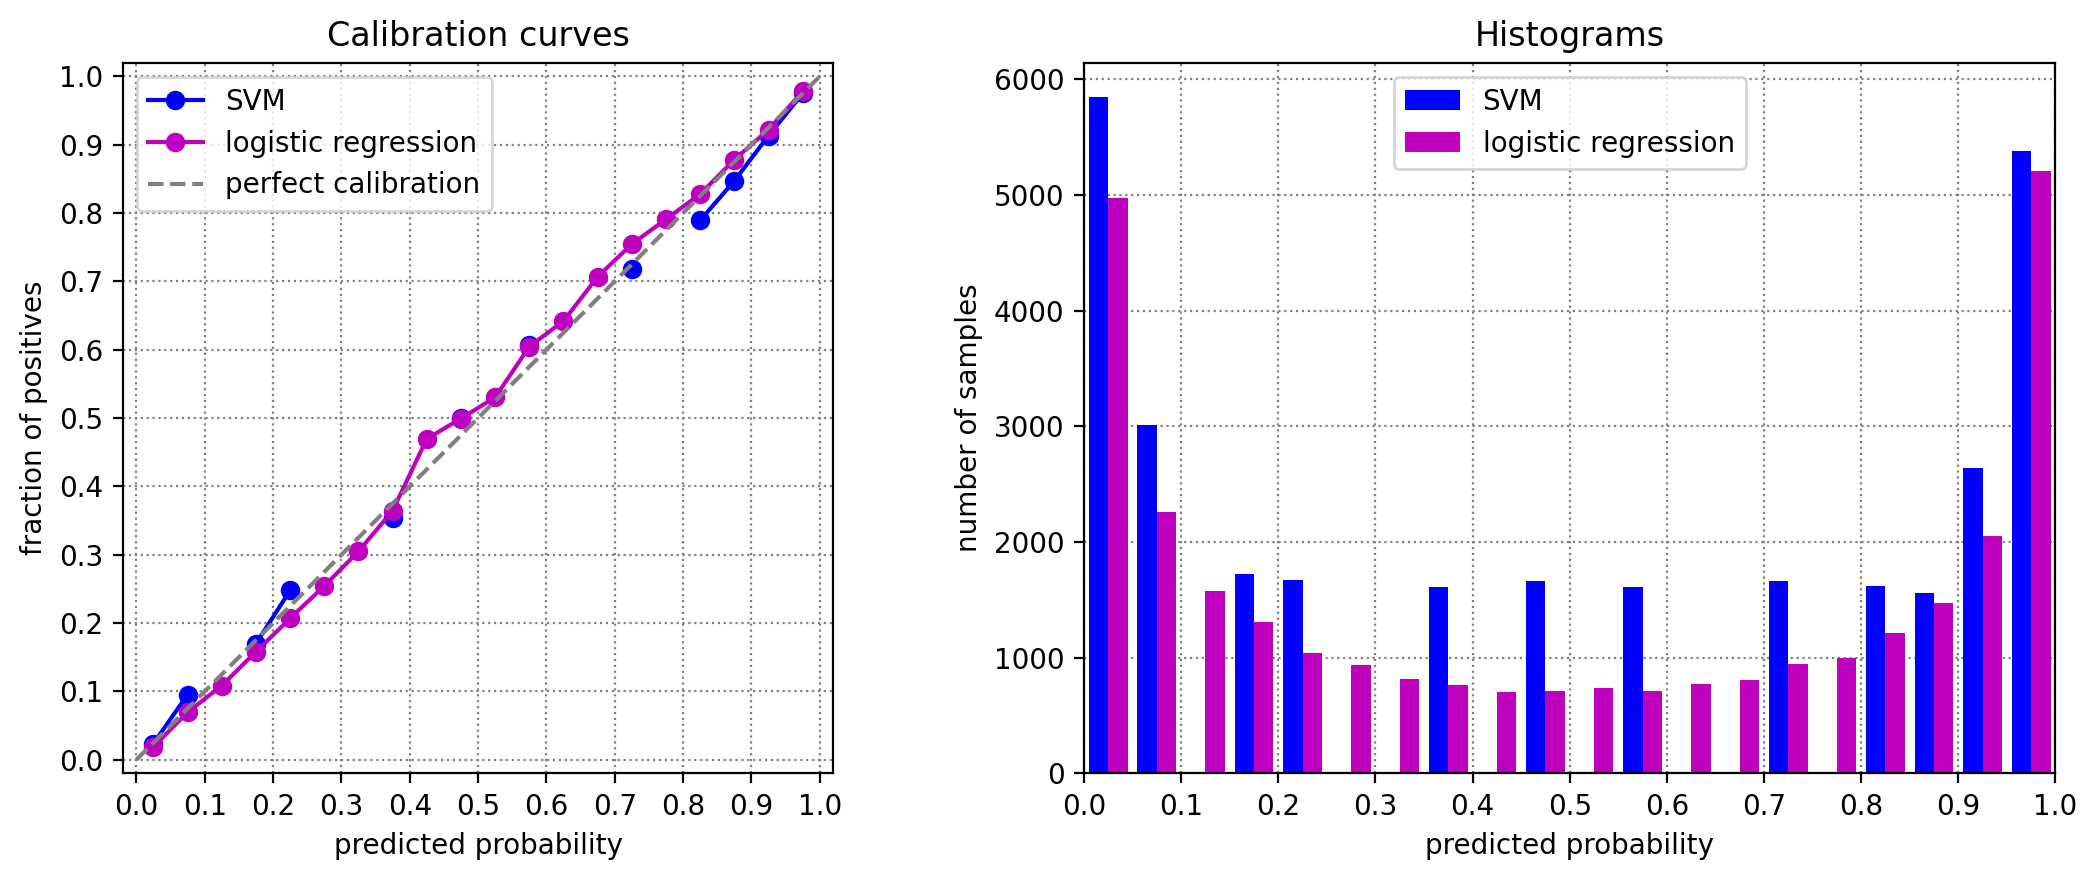

In [35]:
plot_calib_hist(n_bins=20)

<font color=blue>О нет, разрывный график и варинги! Дело в том, что с нашей функцией деформации не все бины в итоге оказываются заполненными (это хорошо видно на гистограмме). Но вообще-то уже по левому графицку можем видеть, что имеющиеся ответы в общем-то откалиброваны хорошо. Посмотрим на графики с меньшим числом бинов:</font>

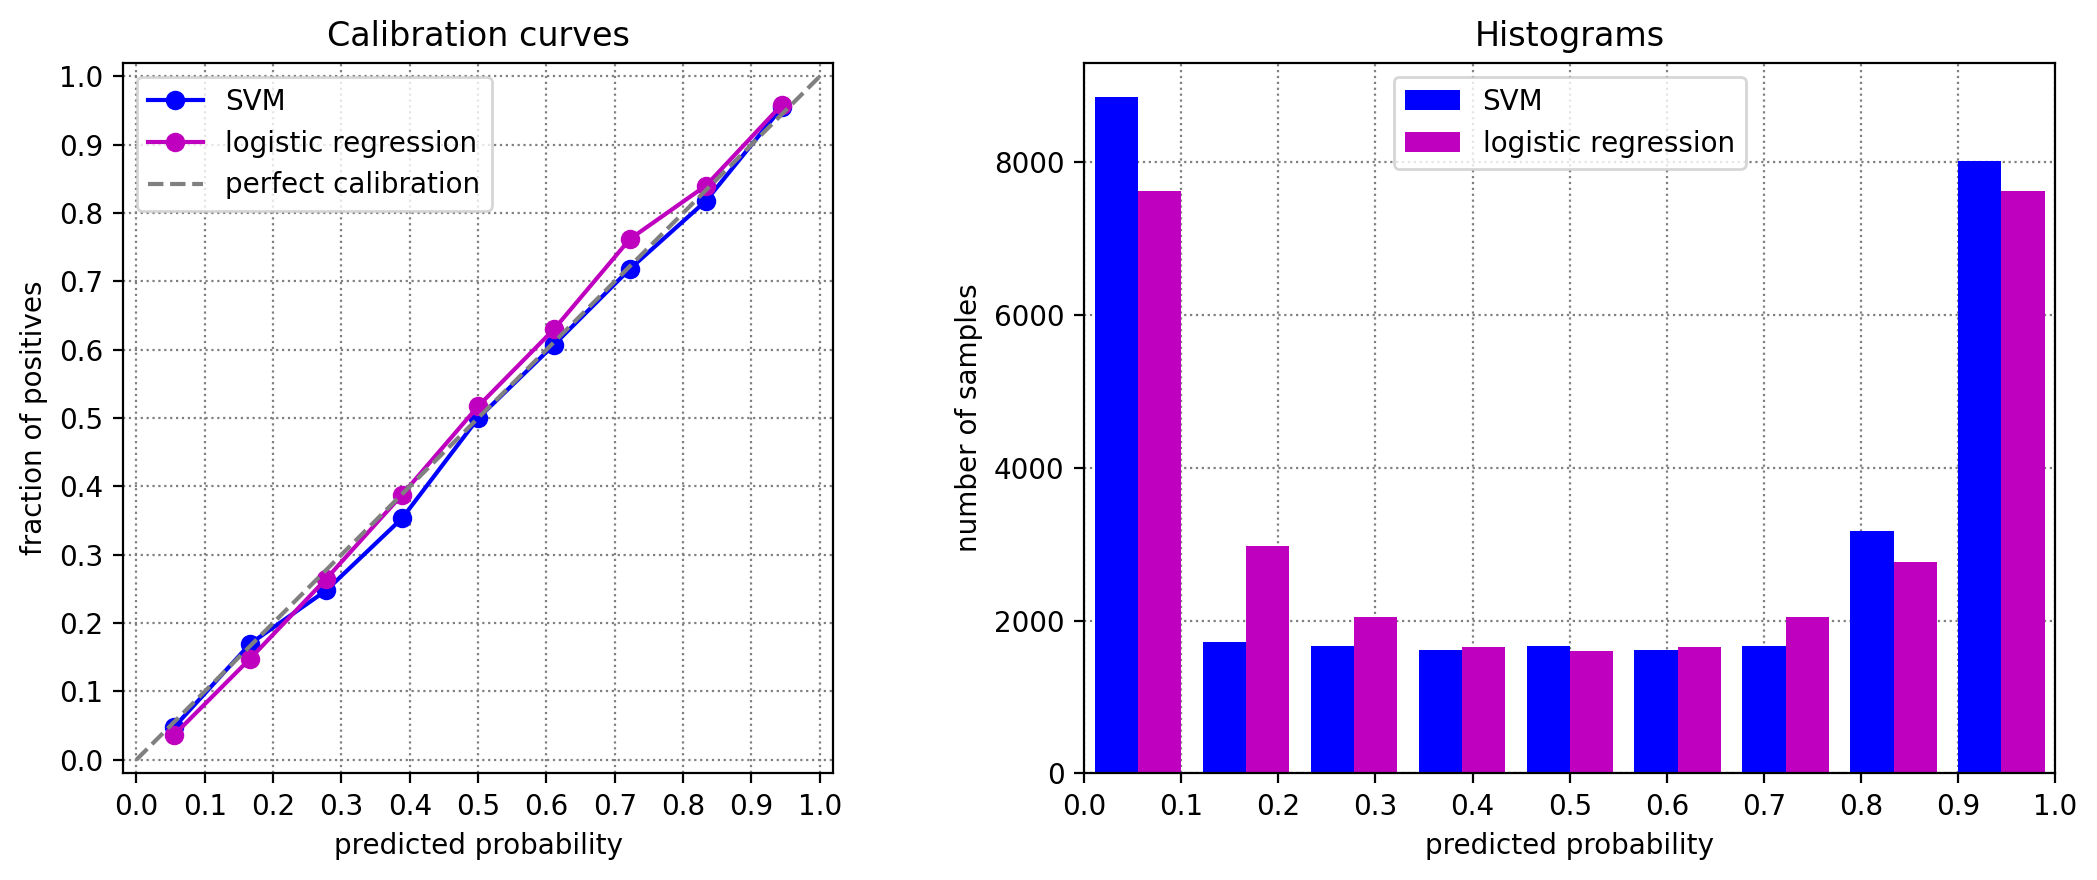

In [36]:
plot_calib_hist(n_bins=9)

<font color=blue>Вот теперь лучше видно, что даже такая простая калибровка работает, причем неплохо — в данном случае SVM + бининг оказался откалиброван лучше логистической регрессии. Основное преимущество histogram binning в том, что он непараметрический, просто реализуется и быстро работает. Недостатки: сама функция деформации оказывается разрывной, причем высока вероятность переобучения (последнее лечится фолдингом или отдельной выборкой для калибровки).</font>

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [37]:
dataset_name = '/kaggle/input/porto-seguro-safe-driver-prediction/train.csv'
data = pd.read_csv(dataset_name, index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [38]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [39]:
X_train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.004130,1.37000,4.497130,0.42935,0.500320,0.351120,0.292770,0.178180,0.177930,0.000450,...,5.447950,1.441040,2.87945,7.555420,0.123140,0.631210,0.554500,0.287040,0.344120,0.151950
std,2.019429,0.67912,2.744301,0.49662,1.500394,0.477323,0.455036,0.382666,0.382456,0.021209,...,2.341304,1.201282,1.69067,2.749553,0.328599,0.482479,0.497023,0.452383,0.475083,0.358974
min,0.000000,-1.00000,0.000000,-1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.00000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.00000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.00000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.00000,7.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.00000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.00000,11.000000,1.00000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.000000,8.000000,13.00000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

<font color=blue>Поскольку регуляризация предлагается в следующем задании, пока будем обучим модель без нее.</font>

In [40]:
model = LogisticRegression(solver='saga', max_iter=1e3,
                           penalty='none', verbose=3,
                           tol=1e-3, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 380 epochs took 52 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.9s finished


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

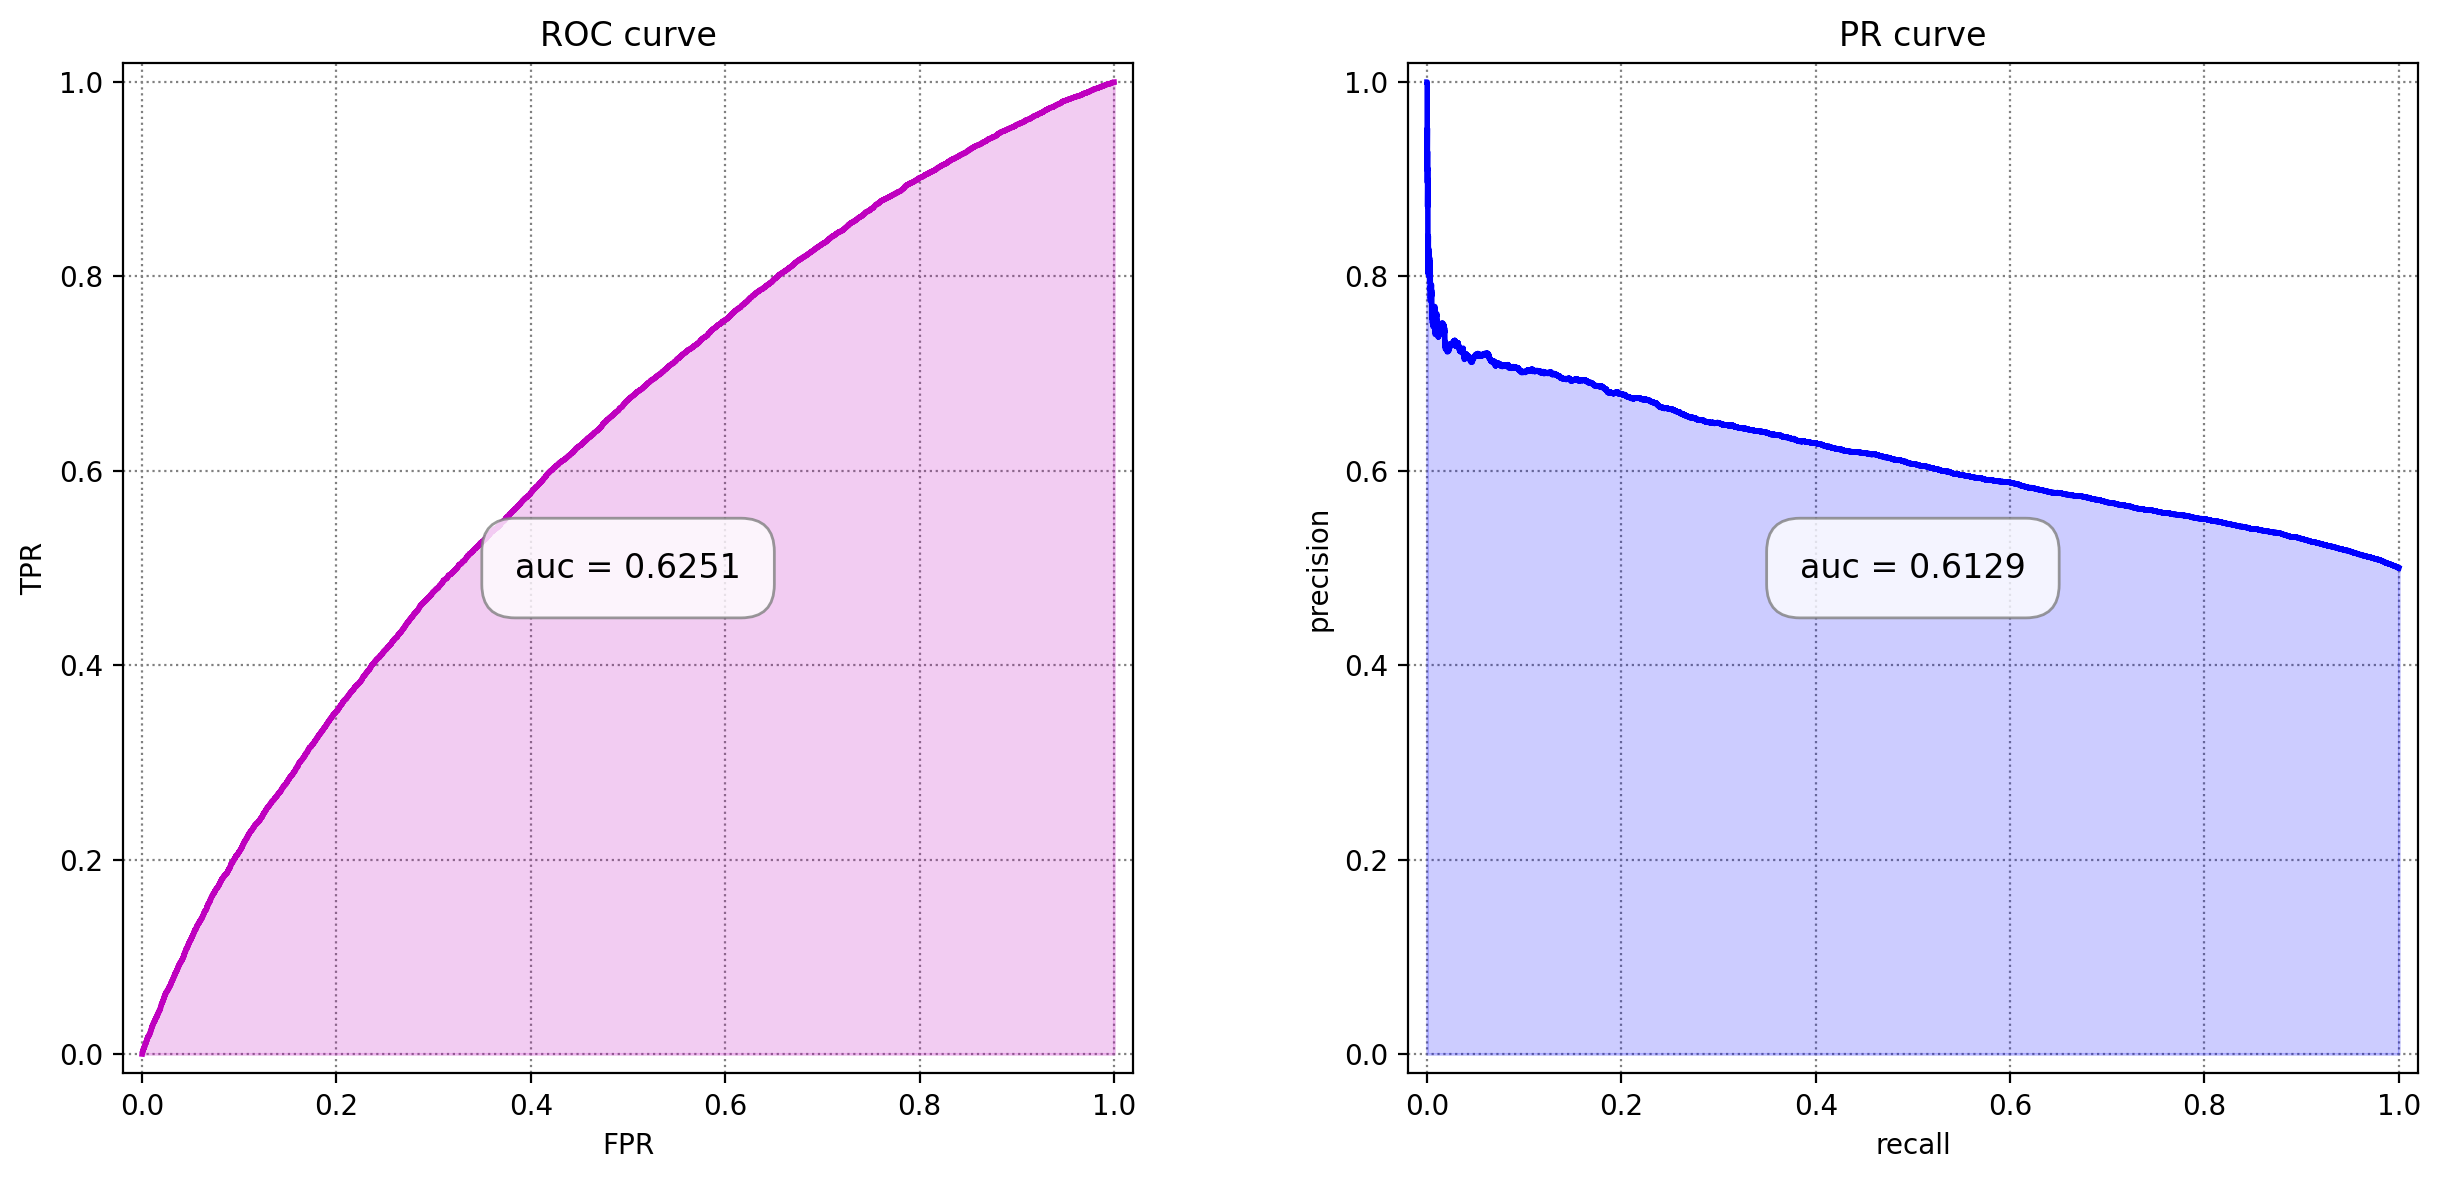

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
fig, axes = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)
vis_curve(axes[0], 'ROC curve', fpr, tpr, 'm', 'FPR', 'TPR')
vis_curve(axes[1], 'PR curve', recall, precision, 'b', 'recall', 'precision')

**Ответ:**
* <font color=blue>При полноте, равной единице, точность крайне близка к $\frac{1}{2}$. Это говорит о том, что после семплирования и шафла у нас в трейне и тесте классы стали сбалансированными — этого и следовало ожидать.</font>
* <font color=blue>Значения площадей под кривыми говорят об относительно невысоком качестве классификации.</font> <font color=blue><b>UPD</b><i> (сообщение из будущего):</i> не таком уж и невысоком!</font>

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

<font color=blue>Поскольку не сказано, а каком регуляризаторе идет речь, возьмем дефолтный вариант — $L_2$. Параметры $\alpha$ рассмотрим по логарифмической сетке $10^{-3},10^{-2},\dots, 10^3$. Пересчитывать логлосс будем не на каждой итерации (в противном случае получим чересчур сТоХаСтИчЕсКиЕ кривые), а каждые 20 итераций на 30 эпохах, то есть в совокупности алгоритм пройдет 600 итераций для каждого $\alpha$. Заметим, что здесь и далее под «итерацией» имеется в виду шаг внутри обучения LogisticRegression, который независимо от метода обучения в самом sklearn'е называется эпохой.</font>

In [42]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn.exceptions import ConvergenceWarning
import warnings

alphas = np.logspace(-3, 3, 7)
n_epochs = 30
max_iter = 20
epochs = np.arange(1, n_epochs + 1)
losses_train = []
losses_test = []

for alpha in alphas:
    model = LogisticRegression(solver='saga', warm_start=True,
                               C=1/alpha, max_iter=max_iter,
                               random_state=0)
    loss_train = []
    loss_test = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        for epoch in tqdm(epochs):
            model.fit(X_train, y_train)
            loss_train.append(log_loss(y_train, model.predict_proba(X_train)))
            loss_test.append(log_loss(y_test, model.predict_proba(X_test)))
    losses_train.append(loss_train)
    losses_test.append(loss_test)


100%|██████████| 30/30 [01:26<00:00,  2.89s/it]


<font color=blue>Теперь для каждого $\alpha$ построим график зависимости функции потерь от номера итерации (сверху — на обучающей, снизу — на отложенной выборке). Границы по оси $y$ положим равными отдельно для обучения и отдельно для теста, инчае графики слипнутся еще сильнее.</font>

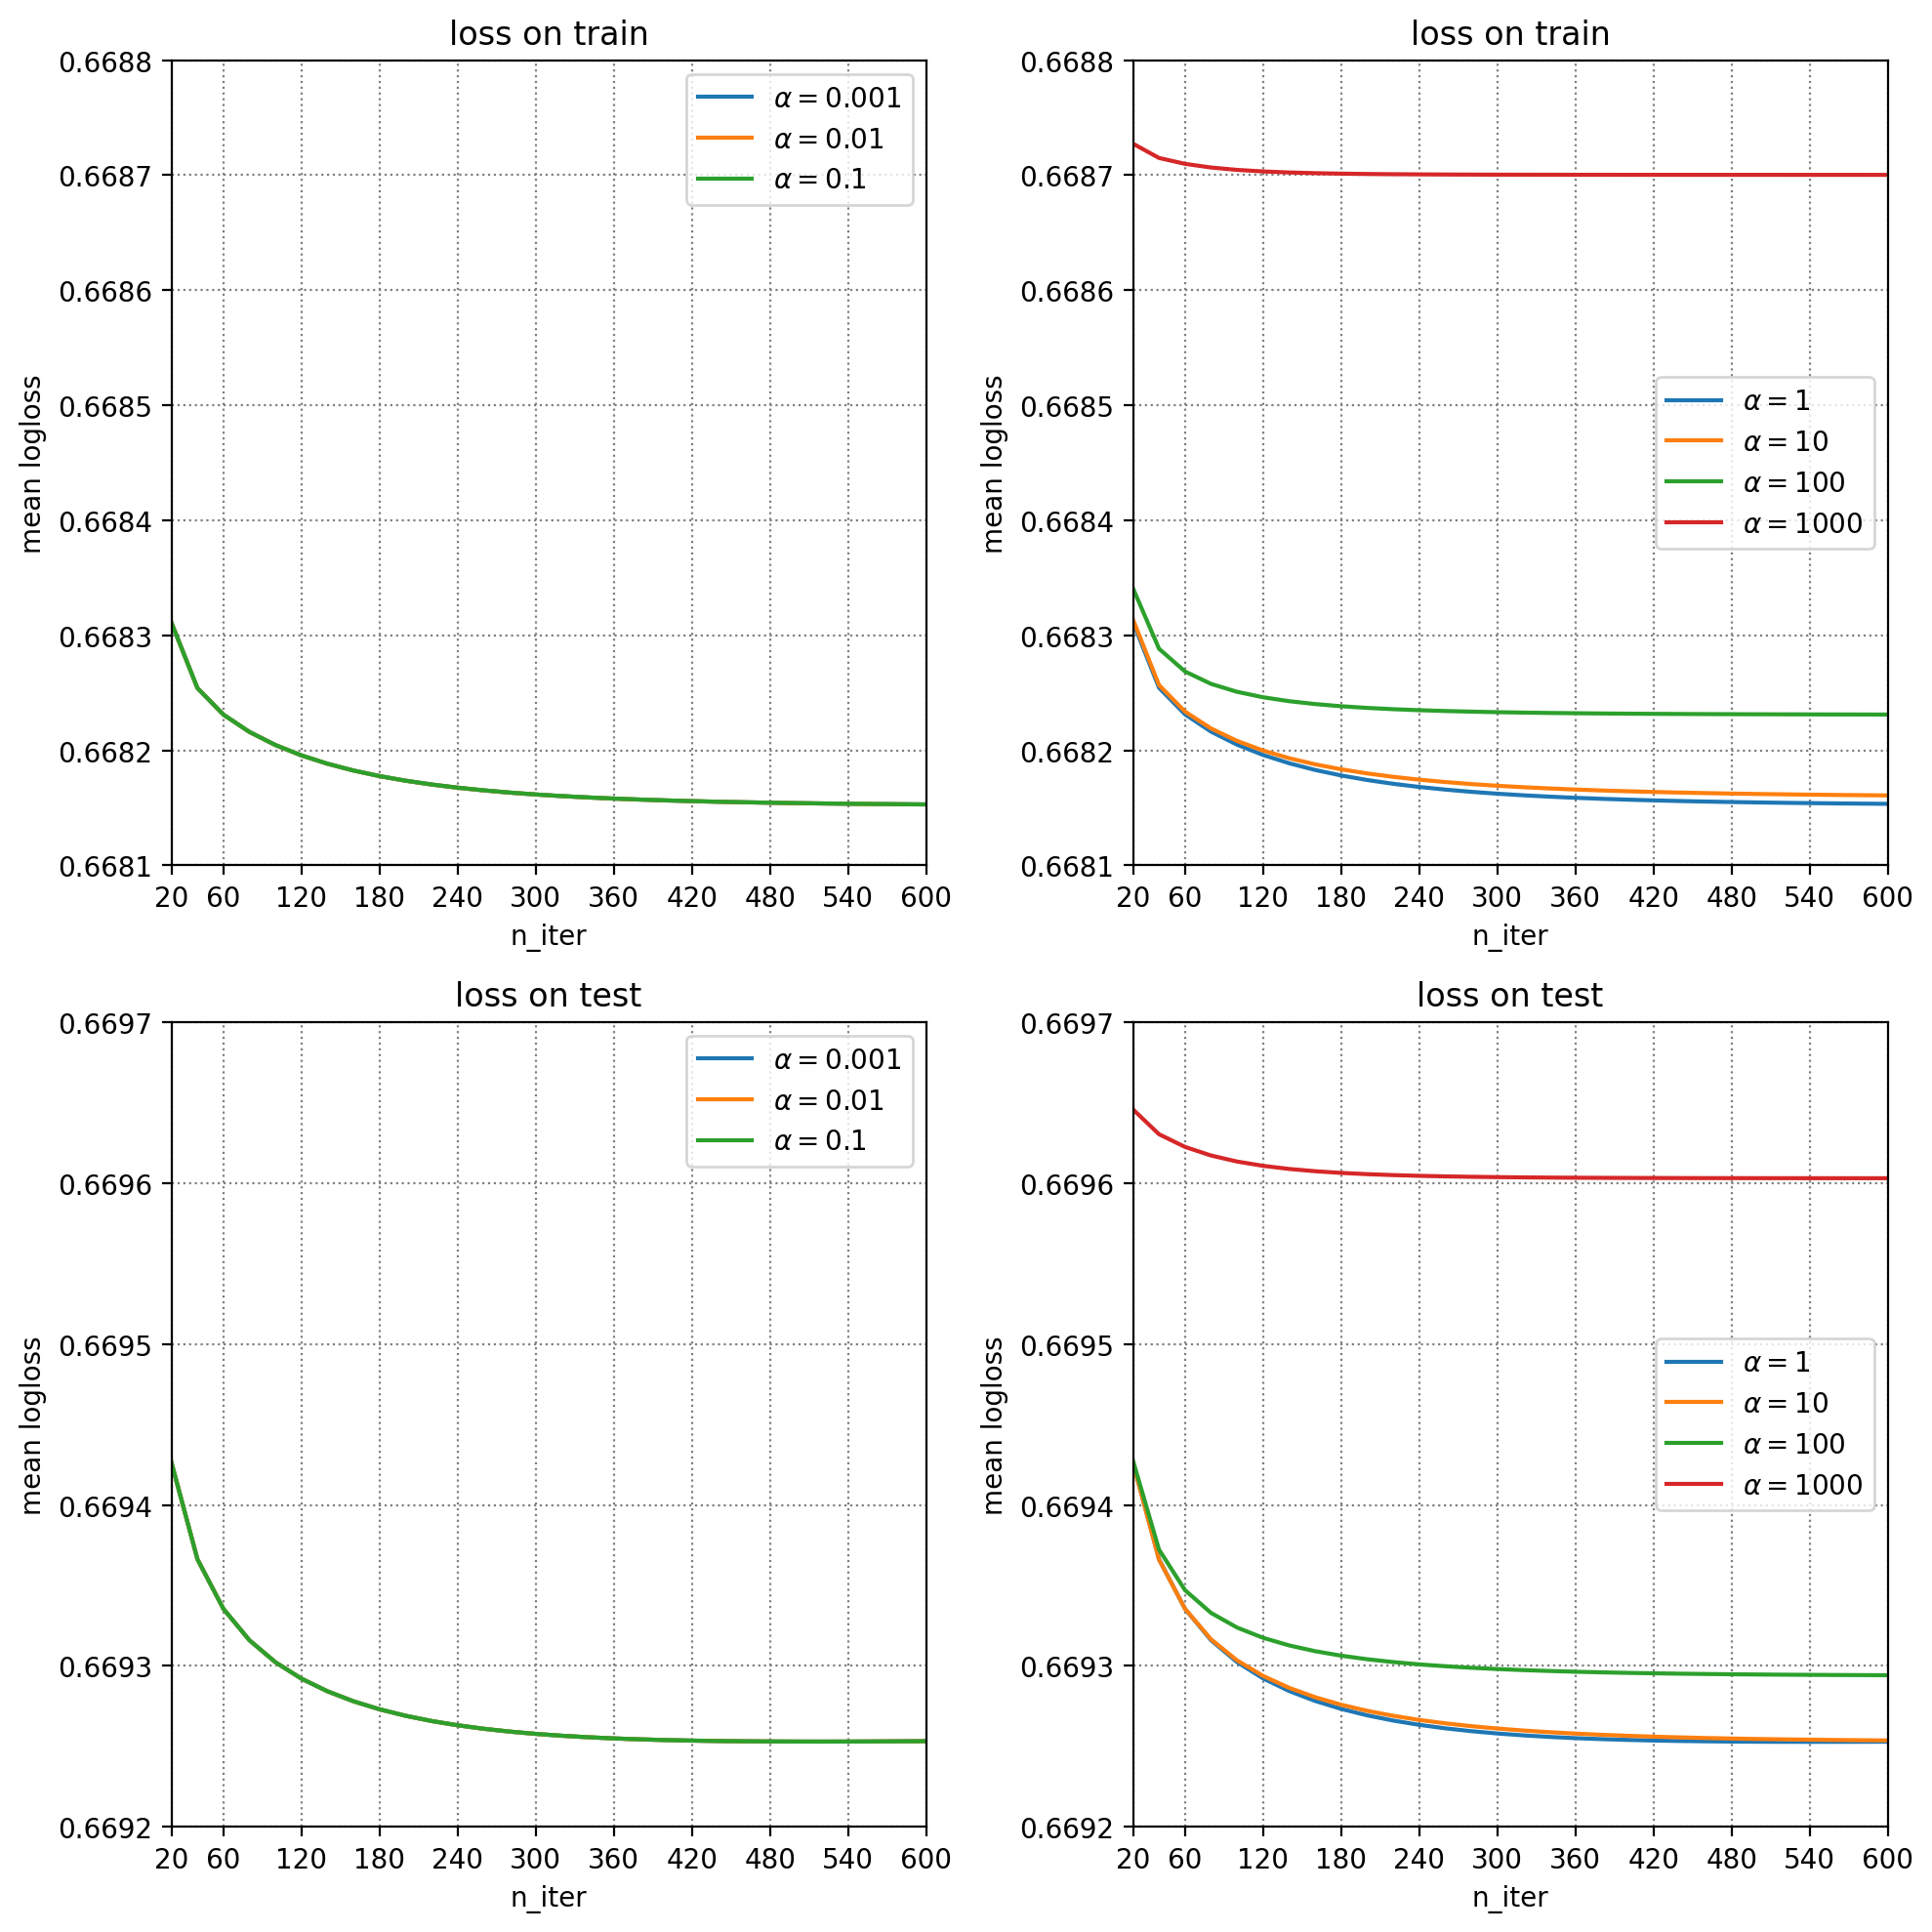

In [43]:
plt.figure(figsize=(10, 10))

titles = ['loss on train', 'loss on test'] * 2
all_losses = [losses_train[:3], losses_test[:3],
              losses_train[3:], losses_test[3:]]
plt_alphas = [alphas[:3]] * 2 + [alphas[3:].astype(int)] * 2
xticks = [20, *range(max_iter * 3, max_iter * n_epochs + 1, max_iter * 3)]
ylims = [(0.6681, 0.6688), (0.6692, 0.6697)] * 2
subpls = [221, 223, 222, 224]
plt_iter = enumerate(zip(all_losses, titles, plt_alphas, ylims, subpls))
for n_subplot, (losses, title, sp_alphas, ylim, subpl) in plt_iter:
    plt.subplot(subpl)
    plt.title(title)
    for loss, alpha in zip(losses, sp_alphas):
        plt.plot(epochs * max_iter, loss, label=f'$\\alpha={alpha}$')
    plt.xticks(xticks)
    plt.xlim(20, n_epochs * max_iter)
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('n_iter')
    plt.ylabel('mean logloss')

plt.tight_layout()

<font color=blue>Как и следовало ожидать, с ростом числа итераций качество улучшается, причем потери на тесте выше. Для логлосса на обучении монотонность более выраженная (что естественно, ведь мы на него настраиваемся), чем на тесте. При сильной регуляризации функция потерь тоже больше (красный график на правых полотнах). При слабой — логлоссы почти неотличимы (левые полотна). </font>

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(solver='saga', max_iter=1e3,
                           tol=1e-3, verbose=1, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 374 epochs took 50 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.3s finished


In [45]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6251


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [46]:
import re

cat_cols = list(filter(re.compile('.*cat').match, X_train.columns))

def get_ohe(X_train, X_test):
    split_pos = len(X_train)
    X_train_test = pd.concat([X_train, X_test], axis=0)
    X_train_test_ohe = pd.get_dummies(X_train_test, columns=cat_cols)
    return X_train_test_ohe.iloc[:split_pos], X_train_test_ohe.iloc[split_pos:]

Xtr_ohe, Xts_ohe = get_ohe(X_train, X_test)
model.fit(Xtr_ohe, y_train)
y_pred_proba = model.predict_proba(Xts_ohe)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 216 epochs took 88 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


In [47]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6329


<font color=blue>Хотя время, потребовавшееся на обучение модели увеличилось, ROC AUC тоже стал лучше. Интересно, что если смотреть по итерациям, то алгоритм сошелся даже быстрее.</font>

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

<font color=blue>Нехитрая и эффективная реализация счетчика может быть сделана с помощью обычной группировки по значениям категории. Для зашумления добавим к посчитанным признакам попробуем добавить гауссовский шум. Рассмотрим результаты для различных значений $\sigma$ по уже любимой логарифмической сетке, а также $\sigma=0$, соответствующее отсутствию шума.</font>

In [48]:
y_train_pd = pd.Series(y_train, index=X_train.index)
mean_maps = {col: y_train_pd.groupby(X_train[col]).mean() for col in cat_cols}

def add_noise(maps, std=0.1, seed=0):
    noised_maps = {}
    rng = np.random.default_rng(seed=seed)
    for key, vals in maps.items():
        noised_maps[key] = vals + rng.normal(scale=std, size=len(vals))
    return noised_maps

In [49]:
stds = np.hstack([0, np.logspace(-4, 0, 5)])
results = pd.DataFrame(index=pd.Index(stds, name=r'$\sigma$'), columns=['ROC AUC'], dtype=float)

for std in stds:
    mean_noised_maps = add_noise(mean_maps, std)
    Xtr_mean_noise = X_train.replace(mean_noised_maps)
    Xts_mean_noise = X_test.replace(mean_noised_maps)
    model.fit(Xtr_mean_noise, y_train)
    y_pred_proba = model.predict_proba(Xts_mean_noise)[:, 1]
    results.loc[std] = roc_auc_score(y_test, y_pred_proba)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 284 epochs took 38 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 284 epochs took 38 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 288 epochs took 39 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 296 epochs took 40 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 336 epochs took 46 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 106 epochs took 14 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s finished


In [50]:
results.style.highlight_max().set_precision(4)

,ROC AUC
$\sigma$,
0.0,0.6285
0.0001,0.6285
0.001,0.6286
0.01,0.6288
0.1,0.6263
1.0,0.6223


**Ответ:**

* <font color=blue>Время работы, очевидно, лучше, чем при one-hot кодировании. Интересно, что сейчас алгоритм сходится быстрее, чем на непреобразованных признаках. Это можно в том числе объяснить тем, что теперь категориальные признаки фактически приводятся к одинаковому масштабу (да и в исходном датасете достаточно бинарных признаков). С ростом $\sigma$ гауссовского шума алгоритм сходится медленнее, но при слишком большом отклонении ($\sigma=1$) время очень хорошее.</font>
* <font color=blue>И с таким большим $\sigma$ качество хуже, чем при обучении на исходных данных — шум просто перевешивает счетчик. При всех остальных значениях $\sigma$ результаты лучше, чем при обучении на исходных данных. Тем не менее по качеству ROC AUC данный метод уступает one-hot кодированию.</font>

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

<font color=blue><b>TL; DR</b> В качестве «времени» берем индексы, аккуратно обращаемся с дубликатами, получаем отображение в одной строчке, но преобразуем в циклах.</font>

* <font color=blue>В данном случае есть небольшие проблемы с пониманием, что считать «выше в датасете» — у нас нету «времени». Если мы возьмем непосредственно некоторую случайную перестановку, то, во-первых, этот порядок будет лишен смысла, и, во-вторых, мы не сможем построить корректное отображение тестовой выборки (они просто все будут следовать за трейном). Зато в нашем датасете была колонка `id`, задающая исходный порядок и оставшаяся как в трейне, так и в тесте — для ранжирования будем использовать именно ее.</font>

* <font color=blue>Затем вступает другая проблема: семпл с которым мы работаем, был взят повторениями. А это значит, что для одного и того же «времени» у нас может быть несколько статистик. Поэтому для получения искомого отображения нужно будет получить выборку без дупликатов.</font>

* <font color=blue>Сами отображения строятся легко (см. `topmaps = ...`), но вот преобразование исходных данных оказывается нетривиальным, поэтому в данном случае оказалось проще написать циклы. Все из-за трех измерений (колонка, значение категории, индекс). Разбивая по независимым колонкам, у нас остаются пары (значение категории, индекс) — для сравнения, при обычных счетчиках, в том числе сглаженных и усложненных фолдингом, у нас все равно ключом является только категория. Причем ключ-индекс в данном случае проверяется на попадание в определенный интервал, а не совпадение — не получится работать со словарями, придется подключать pd.IntervalIndex. Но даже если так, привычные функции для подобных отображений (в numpy это digitize, searchsorted, в Pandas — replace, apply) не умеют работь с многомерными массивами, массивами пар и мультииндексами. Мне не удалось придумать или найти способ сделать транфсормацию одновременно быстро и с лаконичным кодом.</font>

In [51]:
X_trans = X_train.groupby(X_train.index).first()
y_trans = y_train_pd.groupby(y_train_pd.index).first()
X_train_new = X_train.copy()
X_test_new = X_test.copy()

In [52]:
%%time
for col in cat_cols:
    topmaps = y_trans.groupby(X_trans[col]).expanding().mean()
    for cat_val in topmaps.index.levels[0]:
        for new in [X_test_new, X_train_new]:
            input_inds = new.index[new[col] == cat_val]
            inter_inds = np.digitize(input_inds, topmaps[cat_val].index) - 1
            inter_inds[inter_inds < 0] = 0
            new.loc[new[col] == cat_val, col] = topmaps[cat_val].iloc[inter_inds].values

CPU times: user 3.46 s, sys: 257 ms, total: 3.72 s
Wall time: 3.28 s


In [53]:
model.fit(X_train_new, y_train)
y_pred_proba = model.predict_proba(X_test_new)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 162 epochs took 23 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.8s finished


In [54]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6336


<font color=blue>Это лучший результат в разделе счетчиков. А также получилось лучше, чем при one-hot oO</font>

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

<font color=blue>Если некоторая категория встречается в выборке всего несколько раз, то при использовании счетчиков может возникать деление на число, очень близкое к нулю.</font>

<font color=blue>Реализуем полный вариант счетчиков: функция `get_maps` возвращает словарь отображениями для всех категориальных признаков с возможностью использования разных значений $C$ и $prior$.</font>

In [55]:
def get_smoothed_mean_maps(C=10, prior='mean'):
    if prior is 'mean':
        prior = data[cat_cols].mean()
    elif not hasattr(prior, '__getitem__'):
        prior = dict.fromkeys(cat_cols, prior)
    if not hasattr(C, '__getitem__'):
        C = dict.fromkeys(cat_cols, C)
    maps = {}
    for col in cat_cols:
        gr = y_train_pd.groupby(X_train[col])
        maps[col] = (gr.sum() + C[col] * prior[col]) / (gr.size() + C[col])
    return maps

<font color=blue>Посмотрим, как работают сглаженные счетчики при $C=10$ и $prior=global\_mean$:</font>

In [56]:
smm_maps = get_smoothed_mean_maps()
Xtr_smm = X_train.replace(smm_maps)
Xts_smm = X_test.replace(smm_maps)
model.fit(Xtr_smm, y_train)
y_pred_proba = model.predict_proba(Xts_smm)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 276 epochs took 37 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.1s finished


In [57]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6273


<font color=blue>Полученное качество лучше, чем на данных без обработки. Тем не менее, этот результат хуже по сравнению с one-hot или несглаженным счетчиком. Таким образом, если мы хотим получить на сложных методах кодирования выское качество, нужно искать оптимальные параметры.</font>

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:**

<font color=blue><b>Плюсы:</b></font>
* <font color=blue>Могут содержать много параметров для настройки (благодаря которым можно достичь сопоставимого или более выского качества)</font>
* <font color=blue>Меньшее время работы</font>
* <font color=blue>Меньший объем требуемой памяти</font>

<font color=blue><b>Минусы:</b></font>
* <font color=blue>Могут содержать много параметров для настройки (благодаря которым нужно больше думать и/или тратить время на перебор)</font>
* <font color=blue>Наивные реализации могут дать худшее качество, чем one-hot</font>
* <font color=blue>Более сложные техники (фолдинг, ранжирование) требуют большой внимательности в смысле утечек и обработки крайних случаев</font>

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [58]:
data = pd.read_csv(dataset_name, index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [59]:
X_train, X_test = get_ohe(X_train, X_test)
print(f'total number of features: {X_train.shape[1]}')

total number of features: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

<font color=blue>В качестве модели оптимизации далее возьмем стохастический градиент с критерием останова по числу итераций (в документации явно не указано, но по времени работы можно предположить, что `max_iter` регулирует именно число <u>эпох</u>).</font>

In [60]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [61]:
model = LogisticRegression(solver='sag', max_iter=80, verbose=1, random_state=0)

<font color=blue>Пожалуй, пора сделать функцию для столь частого действа:</font>

In [62]:
def fit_auc(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_proba)

In [63]:
auc = fit_auc(X_train, X_test, y_train, y_test, model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 150 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished


In [64]:
print(f'ROC AUC (only one-hot): {auc:.5f}')

ROC AUC (only one-hot): 0.63809


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [65]:
def select_features(X_train, X_test, n=200):
    col_idx = np.abs(model.coef_[0]).argsort()[-n:]
    if isinstance(X_train, np.ndarray):
        return X_train[:, col_idx], X_test[:, col_idx]
    else:
        return X_train.iloc[:, col_idx], X_test.iloc[:, col_idx]

others = [y_train, y_test, model]
auc = fit_auc(*select_features(X_train, X_test), *others)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 135 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


In [66]:
print(f'ROC AUC (feature selection without normalization): {auc:.5f}')

ROC AUC (feature selection without normalization): 0.63830


<font color=blue>Качество немного улучшилось!</font>

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

<font color=blue>Попробуем и standartization, и min-max scaling.</font>

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

methods = [StandardScaler, MinMaxScaler]
method_names = [method.__name__ for method in methods]
results = pd.DataFrame(index=pd.Index(method_names, name='method'),
                       columns=['all features', 'selected features'],
                       dtype=float)

for method in [StandardScaler, MinMaxScaler]:
    scaler = method()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    results.loc[method.__name__, 'all features'] = fit_auc(
        X_train_norm, X_test_norm, *others)
    results.loc[method.__name__, 'selected features'] = fit_auc(
        *select_features(X_train_norm, X_test_norm), *others)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 149 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 135 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 152 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 134 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


In [68]:
results.style.set_precision(5)

,all features,selected features
method,,
StandardScaler,0.63807,0.63811
MinMaxScaler,0.63802,0.63821


<font color=blue>Результаты получились неоднозначные! До отбора признаковы более высокое качество дает стандартизация, но после отбора признаков ее оценка ухудшается. В то же время, при отборе 200 лучших признаков у min-max scaler'а мы получаем лучший результат. И качество с ним лучше, чем только с one-hot, хотя уступает отбору без какой-либо нормализации — неожиданный результат.</font>

<font color=blue>Заметим, что min-max scaling сохраняет one-hot признаки в отличие от standartization. Таким образом, остальные (числовые) признаки приводятся к масштабу большинства — этим можно объяснить преимущество MinMaxScaler'а в данном эксперименте.</font>

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [69]:
def t_stats(X_pos, X_neg):
    weighted_vars = ((len(X_pos) * X_pos.var() + len(X_neg) * X_neg.var())
                     / (len(X_pos) + len(X_neg)))
    return (X_pos.mean() - X_neg.mean()).abs() / np.sqrt(weighted_vars)

In [70]:
%%time
t = t_stats(X_train.loc[y_train == 1], X_train.loc[y_train == 0])
ttop_cols = t.nlargest(200).index

CPU times: user 828 ms, sys: 74.7 ms, total: 902 ms
Wall time: 910 ms


In [71]:
auc = fit_auc(X_train[ttop_cols], X_test[ttop_cols], *others)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 133 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


In [72]:
print(f'ROC AUC (t-stats feature selection): {auc:.5f}')

ROC AUC (t-stats feature selection): 0.63861


<font color=blue>Ого! t-статистика не только быстро считается, но и показывает на текущий момент лучшее качество по отбору признаков.</font>

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

<font color=blue>Реализуем описанный жадный алгоритм. Дополнительно добавим шафл и огранчиение по числу полных итераций по фичам, чтобы не зациклиться, если все признаки окажутся существенными (у нас оно все равно не достигнется, но это могло бы пригодиться в других задачах).</font>

<font color=blue size=1><i>Вообще, можно было бы смягчить жадность и удалять признак не сразу после ухудшения качества, а рекурсивно пробовать убрать каждый признак отдельно и только после этого исключать самый худший — и проделать такой цикл столько раз, сколько требуется удалить фичей. Но при таком подходе время работы возрастет в соизмеримое с изначальным количеством признаков число раз.</i></font>

In [73]:
def greedy_fs(X_train, X_val, y_train, y_val, model, n_drops,
              shuffle=True, random_state=None, verbose=0, max_full_iter=10):
    model.set_params(verbose=0)
    if shuffle:
        rng = np.random.default_rng(seed=random_state)
    prev_auc = fit_auc(X_train, X_val, y_train, y_val, model)
    suspect = X_train.columns.tolist()
    drop = []
    for n_full_iter in range(max_full_iter):
        if shuffle:
            rng.shuffle(suspect)
        for col in suspect:
            if verbose > 0:
                print(f'{prev_auc:.5f}', end=' ')
            cur_auc = fit_auc(X_train.drop(columns=drop+[col]),
                              X_val.drop(columns=drop+[col]),
                              y_train, y_val, model)
            if cur_auc > prev_auc:
                prev_auc = cur_auc
                drop.append(col)
                if len(drop) == n_drops:
                    break
        for col in drop:
            suspect.remove(col)
        if len(drop) == n_drops:
            break
    if verbose > 0:
        print()
    model.set_params(verbose=1)
    return suspect

<font color=blue>В качестве отладочной информации и маркера того, что что-то происходит, будем выводить на каждом шаге будем выводить достигнутое за прошлые итерации лучшее значение AUC ROC (`prev_auc`), подсматривая за его неубыванием</font> 👀

<font color=blue>Итак, что же произойдет, если мы попробуем удалить таким жадным алгоритмом только один признак (для валидации будем брать половину данных):</font>

In [74]:
valid_size = 0.5
sample = train_test_split(
    X_train, y_train, test_size=valid_size, random_state=0)
%timeit -r1 -n1 greedy_fs(*sample, model, n_drops=1, verbose=True)

0.62725 0.62725 0.62725 
4min 59s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<img src="https://i.imgur.com/dcc6Gsm.jpeg" alt="не плохо но и не ужасно" width="200" align="left">

<font color=blue>Сейчас нам не повезло и с первого раза не получилось найти признак для удаления. Если сейчас понадобилось около 5 минут, то при отборе 200 признаков (соответственно, удалении 27) нам понадобится в лучшем случае чуть меньше часа, но с учетом того, что случайный выбор кандидата на удаление не будет каждый раз успешным (как сейчас), реальное время может оказаться значительно большим. Далее возьмем семпл из $30 000$ объектов исходного трейна с той же долей для валидации. Здесь стоит задуматься о пропорциях классов — но мы берем достаточно много, и они с достаточной точностью сохраняются. Тем не менее такое семплирование отличается от того, которое мы делали ранее (сохраняя пропорции равными). В данном случае балансировать мы не можем, потому что впоследствии все равно будем проверять модель должна работать на полных данных с дисбалансом.</font>

In [75]:
%%time
n = 30000
sample = train_test_split(
    X_train.iloc[:n], y_train[:n], test_size=valid_size, random_state=0)
gr_cols = greedy_fs(*sample, model, n_drops=27, verbose=1, random_state=0)
len(gr_cols)

0.57000 0.57149 0.57164 0.57247 0.57247 0.57248 0.57253 0.57260 0.57260 0.57414 0.57494 0.57499 0.57513 0.57522 0.57522 0.57522 0.57541 0.57663 0.57682 0.57682 0.57682 0.57774 0.57774 0.57804 0.57821 0.57822 0.57822 0.57875 0.57875 0.57875 0.57928 0.57928 0.57928 0.57928 0.58072 0.58097 0.58101 0.58142 0.58142 0.58142 
CPU times: user 3min 6s, sys: 293 ms, total: 3min 7s
Wall time: 2min 59s


200

<font color=blue>Обучим модель на отобранных признаках:</font>

In [76]:
auc = fit_auc(X_train[gr_cols], X_test[gr_cols], *others)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 133 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


In [77]:
print(f'ROC AUC (greedy feature selection): {auc:.5f}')

ROC AUC (greedy feature selection): 0.63752


<font color=blue>С семплированием получается совсем недолго, но вот только качество хуже, чем без отбора — почему? Основная проблема заключается в том, мы действуем слишком жадно и большое значение имеет шафл. Попробуем все же реализовать менее жадную идею, описанную ранее курсивом: будем сначала убирать по одному в цикле все текущие признаки перед удалением, а затем избавляться от самого худшего — то есть проходя каждый раз «по кругу». <b>Хорошая новость: внутри одного цикла признаки можно отбрасывать</b></font> <b><span style="color:#ff0000;">п</span><span style="color:#ff4000;">а</span><span style="color:#ff7f00;">р</span><span style="color:#ffbf00;">а</span><span style="color:#ffff00;">л</span><span style="color:#aaff00;">л</span><span style="color:#55ff00;">е</span><span style="color:#00ff00;">л</span><span style="color:#00ff80;">ь</span><span style="color:#00ffff;">н</span><span style="color:#0080ff;">о</span><span style="color:#0000ff;">.</span></b>

In [78]:
from tqdm.notebook import trange
from joblib import Parallel, delayed

def alt_greedy_fs(X_train, X_val, y_train, y_val, model, n_drops):
    model.set_params(verbose=0)
    suspect = X_train.columns.tolist()
    drop = []
    for i in trange(n_drops):
        aucs = Parallel(n_jobs=-1, verbose=0)(
            delayed(fit_auc)(X_train.drop(columns=drop+[col]),
                             X_val.drop(columns=drop+[col]),
                             y_train, y_val, model)
            for col in suspect)
        idx_max = max(range(len(aucs)), key=lambda idx: aucs[idx])
        drop.append(suspect.pop(idx_max))
        print(f'{max(aucs):.5f}', end=' ')
    model.set_params(verbose=1)
    return suspect

In [79]:
n = 30000
sample = train_test_split(
    X_train.iloc[:n], y_train[:n], test_size=valid_size, random_state=0)
alt_gr_cols = alt_greedy_fs(*sample, model, n_drops=27)
len(alt_gr_cols)

0.58301 0.58480 0.58667 0.58830 0.59004 0.59153 0.59282 0.59413 0.59556 0.59684 0.59807 0.59928 0.60043 0.60153 0.60272 0.60455 0.60620 0.60792 0.60920 0.61074 0.61198 0.61309 0.61403 0.61482 0.61566 0.61643 0.61718 


200

In [80]:
auc = fit_auc(X_train[alt_gr_cols], X_test[alt_gr_cols], *others)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 137 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


In [81]:
print(f'ROC AUC (not so greedy feature selection): {auc:.5f}')

ROC AUC (not so greedy feature selection): 0.63823


<font color=blue>Вот досада! Долго, а качество улучшилось не то чтобы очень.</font>

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**
<font color=blue><b>TL; DR</b> Лучше всего в отборе признаков проявил себя метод фильтрации (t-статистика): он непараметрический, максимально быстрый и с ним было достигнуто лучшее качество. Подробнее в табличке:</font>

|               Методы отбора признаков              |                              Перимущества                              |                                   Недостатки                                  |                Как можно было бы улучшить?               |
|:--------------------------------------------------:|:----------------------------------------------------------------------:|:-----------------------------------------------------------------------------:|:--------------------------------------------------------:|
|                     Без отбора                     |                      Моментальная скорость работы                      |                                Низкое качество                                |              Как можно улучшить то, чего нет             |
| Встроенный метод (по коэффициентам лог. регрессии) | Хорошая скорость работы и простота реализации (только обучение модели) |        Важность учета масштаба признаков, сильная зависимость от модели       | Прочие методы масштабирования, в том числе неравномерные |
|              Фильтрация (t-статистика)             |         Высокая скорость работы, статистическая обоснованность         | Возможно переобучение, для корректной оценки обычно требуется большая выборка |               Попробовать другие статистики              |
|               Обертка (жадный отбор)               |         При наличии времени может оказаться крайне эффективным         |                             Самый медленный метод                             |              Увеличить семпл, число итераций             |

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [82]:
data = pd.read_csv(dataset_name, index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [83]:
print(f'{target.mean():.5f}')

0.03645


<font color=blue>Страховые случаи происходят относительно редко.</font>

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [84]:
X_train, X_test = get_ohe(X_train, X_test)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [85]:
model = LogisticRegression(solver='sag', random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

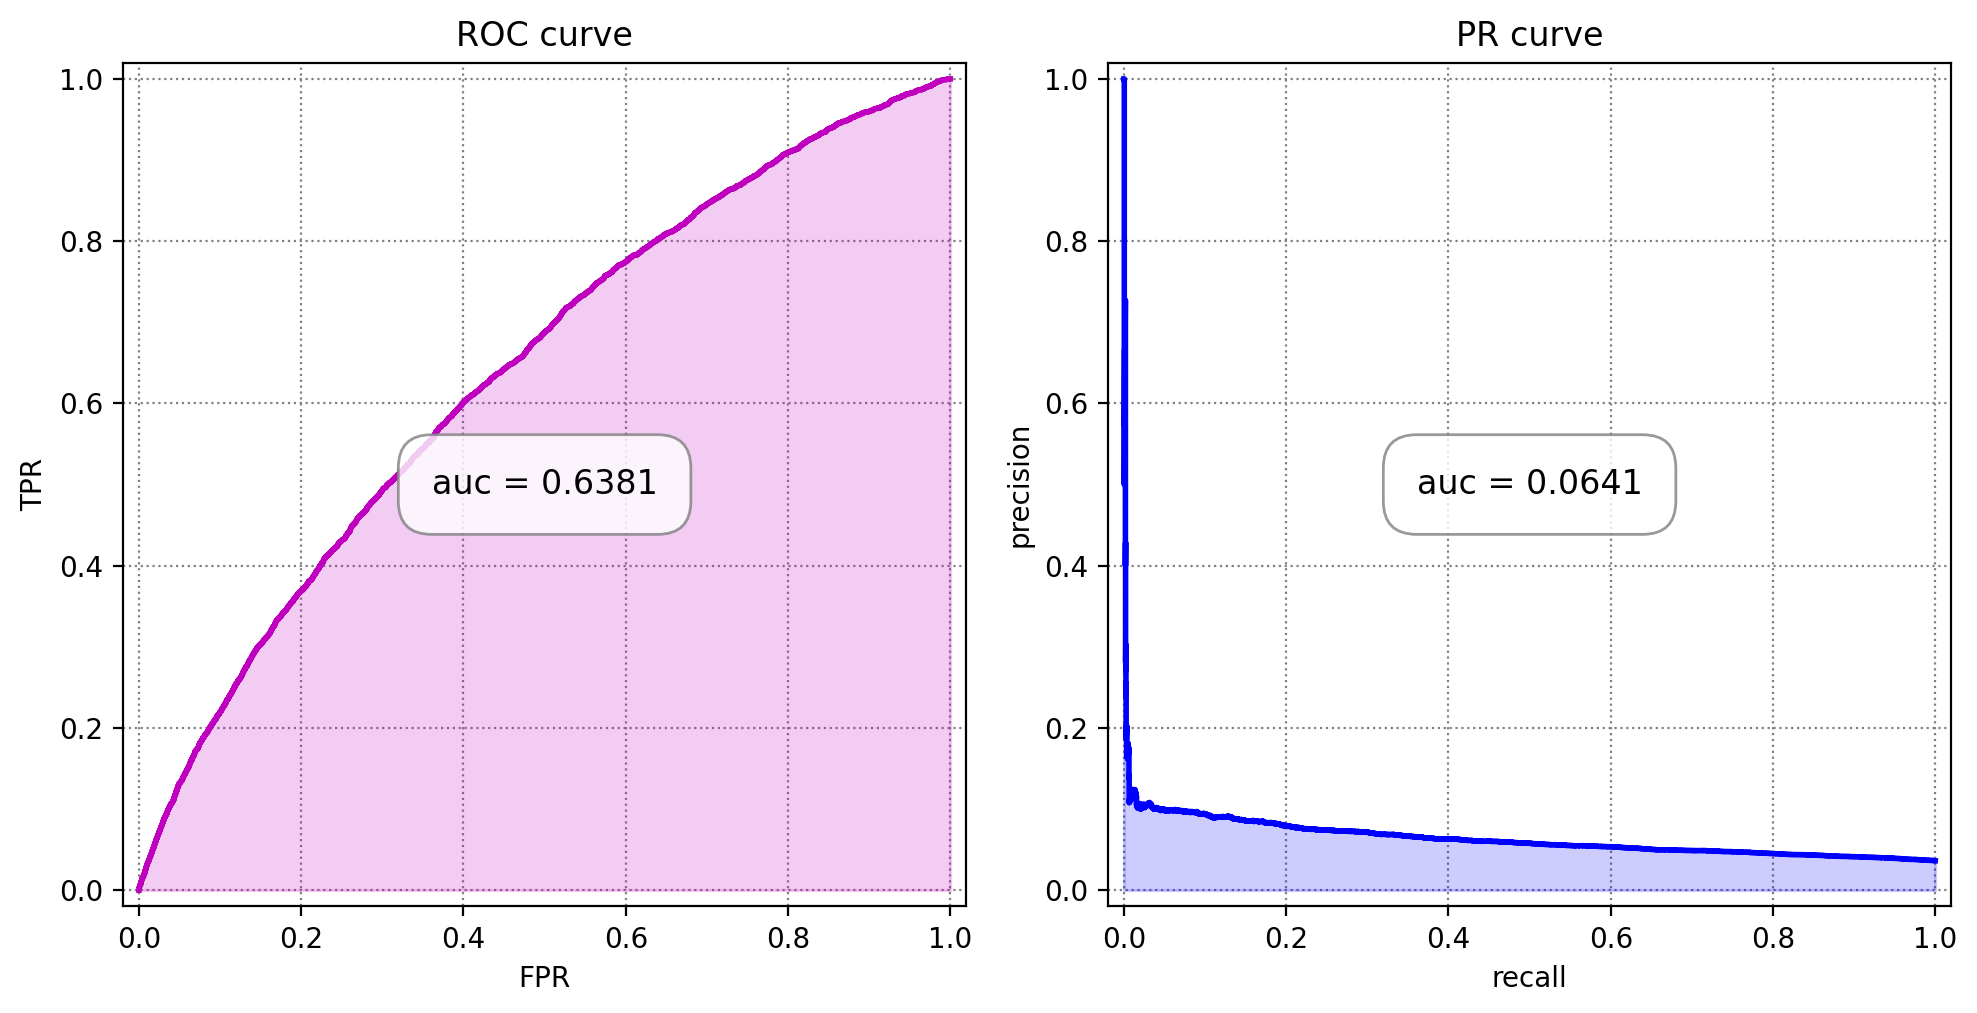

In [86]:
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precisions, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 5))
vis_curve(plt.subplot(121), 'ROC curve', fpr, tpr, 'm', 'FPR', 'TPR')
vis_curve(plt.subplot(122), 'PR curve', recall, precisions,
          'b', 'recall', 'precision')
plt.tight_layout()

* <font color=blue>ROC AUC не веселый: в положительном классе существенно меньше объектов, чем в отрицательном.</font>
* <font color=blue>А PR-кривая и PR-AUC еще грустнее, зато информативнее в смысле дисбаланса: точность сразу становится плохой (с росто recall), ведь почти все объекты отрицательные, поэтому быстро набираются ложноположительные результаты. И мы не сможем одновременно сделать большой и точность, и полноту.</font>

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

<font color=blue>Формализуем «среди наших положителных предсказаний 95% действительно обратились бы по страховому случаю»:</font>

<font color=blue>\begin{align}
\frac{TP}{TP+FP} & \geqslant 0.95 \\
\text{precision} = PPV & \geqslant 0.95
\end{align}</font>
<font color=blue>Посчитатем precision на разных порогах, на точных значениях которых мы формально будем относить объекты к положительному классу (т.е. бинаризация $[a(x) \geqslant threshold]$ — как в sklearn). Начнем с самых высоких и выйдем из цикла при падении точности ниже 0.95:</font>

In [87]:
from sklearn.metrics import precision_score

precisions = precisions[:-1]  # remove extra 1
min_precision = 0.95

print('thresholds   precisions')
for thr, prec in zip(reversed(thresholds), reversed(precisions)):
    print(f'{thr:.9f}  {prec:.3f}')
    if prec < min_precision:
        break

thresholds   precisions
0.511181642  1.000
0.480095197  1.000
0.472754032  0.667


<font color=blue>Итак, в данной задаче и модели порог можно взять как минимум $\approx0.4728$ (можно чуть меньше, главное — больше нижнего выведенного порога). Однако со слишком большими порогами будут формальные проблемы: если мы возьмем выше $\approx 0.5112$ (верхнего выведенного), то функционал качества не будет определен для имеющейся выборки.</font>

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

<font color=blue>Поскольку под рассматриваемой группой понимаются те, кому мы <u>отказали</u>, «доходы» и «расходы» от них будут инвертированы: «зарабатываем» (т.е. не теряем) на «положительных» клиентах 100000, и теряем 5000 на тех, кто из этой группы не обратился бы к нам (а мы ему отказали).</font>

<font color=blue>Таким образом, при фиксированном пороге:</font>
<font color=blue>\begin{align}
\text{profit} &= 100000\cdot TP - 5000\cdot FP \\
&= 100000\cdot TP - 5000\cdot (P - TP) \\
&= 105000 \cdot TP - 5000 \cdot P \\
&= 105000 \cdot (P \cdot PPV) - 5000 \cdot P \\
&= 5000\cdot P \cdot(21\cdot PPV - 1)
\end{align}</font> 

<font color=blue>где $P$ — число тех, кого алгоритм отнес к положительному классу. Наша цель: $\text{profit}\geqslant0$.</font>

In [88]:
profits = 5000 * np.arange(len(precisions), 0, -1) * (21 * precisions - 1)
good_thresholds = thresholds[profits >= 0]

<font color=blue>Мы нашли все подходящие пороги. Посчитаем нижний порог, а также тот, при котором профит будет максимальным:</font>

In [89]:
min_threshold = good_thresholds[0]
idxmax = profits.argmax()
max_profit_threshold = thresholds[idxmax]
print(f'Minimal threshold with non-negative profit: {min_threshold:.4f} ({len(good_thresholds)} rejected clients)')
print(f'Threshold, maximizing the profit: {max_profit_threshold:.4f} ({len(profits) - idxmax} rejected clients)')

Minimal threshold with non-negative profit: 0.0293 (67666 rejected clients)
Threshold, maximizing the profit: 0.0493 (20886 rejected clients)


<font color=blue><s>Цифры и цифры, ничего непонятно.</s> Лучше соорудим threshold-profit график:</font>

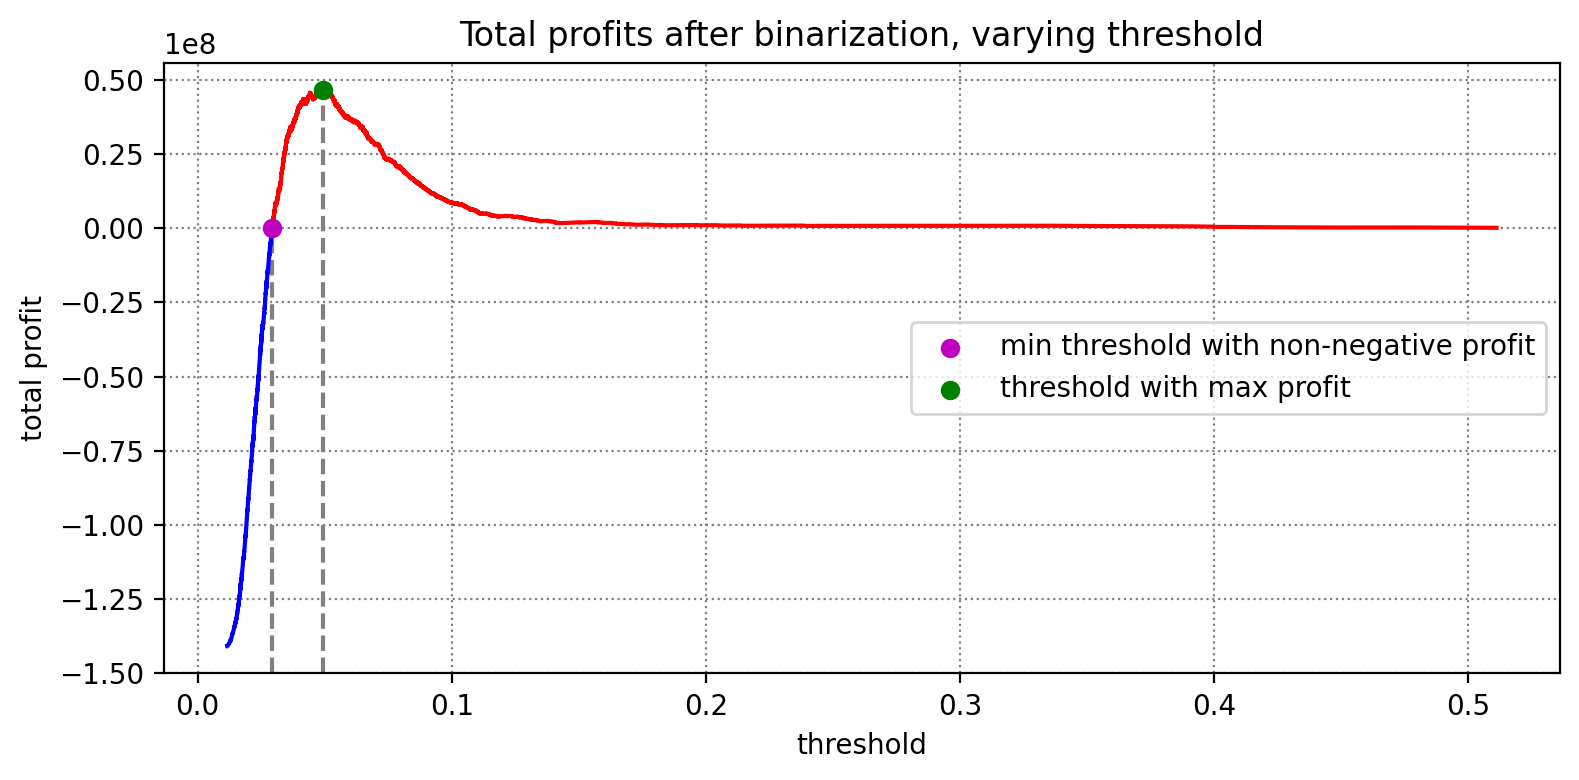

In [90]:
profits = 5000 * np.arange(len(precisions), 0, -1) * (21 * precisions - 1)

plt.figure(figsize=(8, 4))
plt.plot(thresholds[profits < 0], profits[profits < 0], c='b', label=None)
plt.plot(thresholds[profits >= 0], profits[profits >= 0], c='r', label=None)
x_points = [min_threshold, max_profit_threshold]
y_points = [profits[thresholds == x_points[0]], profits[thresholds == x_points[1]]]
plt.scatter(x_points[0], y_points[0],
    c='m', label='min threshold with non-negative profit', zorder=3)
plt.scatter(x_points[1], y_points[1],
    c='g', label='threshold with max profit', zorder=3)
plt.legend(loc='center right')
plt.ylim(-1.5e8)
plt.vlines(x_points, -1.5e8, y_points, linestyle='--', color='grey')
plt.xlabel('threshold')
plt.ylabel('total profit')
plt.title('Total profits after binarization, varying threshold')
plt.tight_layout()

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

Полезные и использовавшиеся источники:
* https://github.com/VowpalWabbit/vowpal_wabbit/wiki
* http://www.philippeadjiman.com/blog/2018/04/03/deep-dive-into-logistic-regression-part-3/
* https://www.kaggle.com/kashnitsky/vowpal-wabbit-tutorial-blazingly-fast-learning#3.-Vowpal-Wabbit
* https://stackoverflow.com/questions/28640837/vowpal-wabbit-how-to-represent-categorical-features

In [91]:
!zcat '/kaggle/input/avazu-ctr-prediction/train.gz' > './train.csv'

<font color=blue>Подглянем (чуть-чуть!) в датасет.</font>

In [92]:
examples = pd.read_csv('train.csv', nrows=10)
examples

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23


In [93]:
!wc -l train.csv

40428968 train.csv


<font color=blue>И правда, в датасете 40 миллионов строк.</font>

<font color=blue>О боже, мы почти забыли установить библиотеку.</font>

In [94]:
%%capture
!git clone --recursive https://github.com/VowpalWabbit/vowpal_wabbit.git
!cd vowpal_wabbit; make
!cd vowpal_wabbit; make install

In [95]:
!vw --version

8.9.0 (git commit: e3d387a83)


<font color=blue>id безжалостно выбрасываем — он служит только для идентификации очередной записи. Для этих целей в формате VW есть тег, но нам это не понадобится и лишь займет память. Что касается признаков, то почти все они категориальные. Между некоторыми, возможно, есть отношение порядка, но нам об этом неизвестно. В исходном числовом формате передадим только два признака. Также мы разобьем все признаки на группы по смыслу — тогда VW объединит их в одинаковые подпространство имен (при хешировании):</font>

In [96]:
splits = [slice(2, 5), slice(5, 8), slice(8, 11), slice(11, 16), slice(16, 24)]
for spl in splits:
    print(list(examples.columns[spl]))

# '=' is added to cat-features for better readability
# feature names & groups are coded with the only letter
# to save some memory
feature_prefixes = [
    '|F h:', 'c=', 'b:',
    '|S i=', 'd=', 'c=',
    '|A i=', 'd=', 'c=',
    '|D i=', 'p=', 'm=', 't=', 'c=',
    '|C a=', 'b=', 'c=', 'd=', 'e=', 'f=', 'g=', 'e=',
]

['hour', 'C1', 'banner_pos']
['site_id', 'site_domain', 'site_category']
['app_id', 'app_domain', 'app_category']
['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']
['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


<font color=blue>Теперь реализуем разделение на трейн/тест (как и предполагалось в задании, берем 30 млн на обучение и остаток — на тестовую выборку), преобразование в VW-формат, вычисление AUC ROC по файлам.</font>

In [97]:
from itertools import islice
from sklearn.metrics import roc_auc_score as auc

labmap = {
    '0': '-1 ',
    '1': '1 ',
}

def entry_csv2vw(entry, prefs, seplabel=True):
    lst = entry.strip().split(',')
    if seplabel:
        return int(labmap[lst[1]]), ' '.join(p + f for p, f in zip(prefs, lst[2:])) + '\n'
    else:
        return labmap[lst[1]] + ' '.join(p + f for p, f in zip(prefs, lst[2:])) + '\n'

def train_test_vw(fname, feature_prefs, train_size=30000000):
    with open(fname, 'r') as fin:
        _ = fin.readline()  # ignore column names
        with open('train.vw', 'w') as fout:
            for line in islice(fin, train_size):
                fout.write(entry_csv2vw(line, feature_prefs, seplabel=False))
        test_labels = []
        with open('test.vw', 'w') as fout:
            for line in fin:
                label, vw_line = entry_csv2vw(line, feature_prefs)
#                 print(label, vw_line)
                fout.write(vw_line)
                test_labels.append(label)
        np.save('test_labels.npy', np.array(test_labels), allow_pickle=False)

def get_auc():
    return auc(np.load('test_labels.npy'), np.loadtxt('preds.txt'))

<font color=blue>Кстати, истинные метки из тестовой выборки удалять было необязательно (они игнорируются с помощью параметра VW).</font>

In [98]:
train_test_vw('train.csv', feature_prefixes)
!rm train.csv

In [99]:
!vw train.vw -f model.vw --loss_function logistic

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.vw
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       22
0.488136 0.283124            2            2.0  -1.0000  -1.1170       22
0.304292 0.120448            4            4.0  -1.0000  -2.2664       22
0.214658 0.125024            8            8.0  -1.0000  -2.3124       23
0.363789 0.512920           16           16.0  -1.0000  -2.6336       22
0.393967 0.424145           32           32.0  -1.0000  -1.8419       22
0.519177 0.644386           64           64.0  -1.0000  -0.8039       22
0.532424 0.545671          128          128.0  -1.0000  -1.2779       22
0.489940 0.447456          256          256.0   1.0000  -1.7938       22
0.459096 0.

In [100]:
!vw test.vw -t -i model.vw -p preds.txt --link logistic

only testing
predictions = preds.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0583       22
    n.a.     n.a.            2            2.0  unknown   0.2208       23
    n.a.     n.a.            4            4.0  unknown   0.0792       22
    n.a.     n.a.            8            8.0  unknown   0.0130       22
    n.a.     n.a.           16           16.0  unknown   0.1508       22
    n.a.     n.a.           32           32.0  unknown   0.0596       22
    n.a.     n.a.           64           64.0  unknown   0.2890       22
    n.a.     n.a.          128          128.0  unknown   0.2035       22
    n.a.     n.a.          256          256.0  unknown   0.2959       23
  

In [101]:
y_test = np.load('test_labels.npy')
aucs = []
aucs.append(auc(y_test, np.loadtxt('preds.txt')))
aucs[-1]

0.7385460473067718

<font color=blue>Отлично, на отложенной выборке сразу достигнуто 0.738.</font>

<font color=blue>Попробуем начать с изменения темпа обучения (learning rate). На самом деле он по умолчанию адаптивный, то есть разный для разных признаков. Мы же чуть-чуть подвигаем initial value. Дополнительно мы включим кэширование параметром -c. Это означает, что алгоритм создаст кэш-файл для датасета в своем формате и впоследствии вместо долгого чтения текстовых данных будет проверять наличие именно кэш-файла. Параметр --quiet просто выключит отладочный вывод.</font>

In [102]:
!vw train.vw -f model.vw --loss_function logistic -c -l 0.7 --quiet
!vw test.vw -t -i model.vw -p preds.txt --link logistic -c --quiet
aucs.append(auc(y_test, np.loadtxt('preds.txt')))
aucs[-1]

0.7358007444832076

In [103]:
!vw train.vw -f model.vw --loss_function logistic -c -l 0.3 --quiet
!vw test.vw -t -i model.vw -p preds.txt --link logistic -c --quiet
aucs.append(auc(y_test, np.loadtxt('preds.txt')))
aucs[-1]

0.7414421396839991

<font color=blue>Итак, больший темп ухудшил качество, а вот меньший (0.3) — повысил. Кстати, мы использовали кэширование (-c), а оно особенно полезно при многократном прохождении датасета. Число таких эпох в VW регулируется параметром --passes. Попробуем пройти 3 раза:</font>

In [104]:
!vw train.vw -f model.vw --loss_function logistic -c -l 0.3 --passes 3
!vw test.vw -t -i model.vw -p preds.txt --link logistic -c
aucs.append(auc(y_test, np.loadtxt('preds.txt')))

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.3
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train.vw.cache
ignoring text input in favor of cache input
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       22
0.533311 0.373476            2            2.0  -1.0000  -0.7924       22
0.363769 0.194227            4            4.0  -1.0000  -1.7222       22
0.275738 0.187707            8            8.0  -1.0000  -1.8111       23
0.365319 0.454899           16           16.0  -1.0000  -2.0242       22
0.445074 0.524829           32           32.0  -1.0000  -2.4312       22
0.531481 0.617889           64           64.0  -1.0000  -1.7503       23
0.533322 0.535162          128          128.0  -1.0000  -1.5414       22
0.458727 0.384133        

In [105]:
aucs[-1]

0.7402474119845751

<font color=blue>Увеличение числа эпох немного ухудшило ROC AUC на валидации, но, возможно, в таком случае нам следует еще уменьшить темп:</font>

In [106]:
!vw train.vw -f model.vw --loss_function logistic -c -l 0.1 --passes 3
!vw test.vw -t -i model.vw -p preds.txt --link logistic -c
aucs.append(auc(y_test, np.loadtxt('preds.txt')))

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.1
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train.vw.cache
ignoring text input in favor of cache input
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       22
0.618828 0.544509            2            2.0  -1.0000  -0.3233       22
0.513814 0.408801            4            4.0  -1.0000  -0.7786       22
0.449916 0.386017            8            8.0  -1.0000  -0.8669       23
0.453750 0.457583           16           16.0  -1.0000  -1.1177       22
0.473690 0.493631           32           32.0  -1.0000  -1.5506       22
0.539191 0.604691           64           64.0  -1.0000  -1.3870       23
0.518003 0.496815          128          128.0  -1.0000  -1.5089       22
0.455991 0.393979        

In [107]:
aucs[-1]

0.7437797611517335

<font color=blue>Отлично, качество выросло! Библиотека, разумеется, не ограничинивается базовыми параметрами оптимизации — есть еще множество параметров для настройки алгоритма. Сейчас же мы попробуем что-то сделать с признаками. А именно, VW позволяет их комбинировать по неймспейсам — фактически автоматиеская генерация фичей. Попробуем соединить первую (три признака) с последней (анонимизированные категориальные) с помощью --interactions. <s>Да и сделаем это с помощью дообучения модели (-i)</s> Нет, при «генерации» новых фичей мы расширяем пространство признаков и добавляем новые веса. Поэтому сейчас лучше обучим модель заново. Хотя, надо оговориться, мы комбинируем признаки, смысл которых от нас скрыт, поэтому результаты могут быть непредсказуемыми:</font>

In [108]:
!vw train.vw -f model.vw --loss_function logistic -c -l 0.1 --passes 3 --interactions FC
!vw test.vw -t -i model.vw -p preds.txt --link logistic -c
aucs.append(auc(y_test, np.loadtxt('preds.txt')))

creating features for following interactions: FC 
final_regressor = model.vw
Num weight bits = 18
learning rate = 0.1
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train.vw.cache
ignoring text input in favor of cache input
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       38
0.601971 0.510795            2            2.0  -1.0000  -0.4055       38
0.475520 0.349069            4            4.0  -1.0000  -0.9895       38
0.417589 0.359658            8            8.0  -1.0000  -0.9398       47
0.439416 0.461242           16           16.0  -1.0000  -1.1618       38
0.462875 0.486334           32           32.0  -1.0000  -1.7673       38
0.535650 0.608424           64           64.0  -1.0000  -1.7421       47
0.907922 1.280195          128          128.0  -

In [109]:
aucs[-1]

0.6574325597455175

<font color=blue>Случайное угадывание для объединения фичей ухудшило модель, что неудивительно. На самом деле --interactions считается очень полезной опцией. Такие возможности для создания новых фичей опять же обусловлены хешированием признаков, благодаря которому вместо огромных one-hot массивов все признаковое пространство умещается в компактные вектора (с некоторой потерями информации). Вышеиспользованные неймспейсы нужны как раз для группировки и разделения таких хеш-функций и получаемых векторов.</font>

In [110]:
print('baseline ROC AUC:', aucs[0])
print('best ROC AUC:', max(aucs))

baseline ROC AUC: 0.7385460473067718
best ROC AUC: 0.7437797611517335
